# 기본 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt #실행 전 런타임 다시 시작

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DNA 프로젝트/신용카드 사용자 연체 예측 AI  경진대회 data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DNA 프로젝트/신용카드 사용자 연체 예측 AI  경진대회 data/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DNA 프로젝트/신용카드 사용자 연체 예측 AI  경진대회 data/sample_submission.csv")

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.4 MB/s eta 0:00:00


In [ ]:
import catboost

In [ ]:
sns.set_palette("Set3")

#sequential_colors = sns.color_palette("RdPu", 10)

#qualitative_colors = sns.color_palette("Set3", 10)

#sns.set_palette("pastel") #Deep, Bright, Muted"

In [ ]:
pd.DataFrame.head(train,5)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0


# EDA

In [ ]:
pd.DataFrame.head(test)

,gender,car,reality,child_num,income_type,edu_type,family_type,house_type,work_phone,phone,...,Age,DAYS_BIRTH_month,DAYS_BIRTH_week,EMPLOYED,DAYS_EMPLOYED_month,DAYS_EMPLOYED_week,ability,income_mean,begin_year,ID
0,M,Y,N,-0.596243,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0,1,...,1.444707,-1.317012,-0.472237,-0.880515,-1.226645,-1.083232,-0.528815,-0.601866,2.379749,0_11.25_21990_0_0_1_0_2.0_M_Y_N_Pensioner_Seco...
1,F,N,Y,-0.596243,State servant,Higher education,Married,House / apartment,0,1,...,0.662172,0.722428,-0.472237,2.717894,-0.956161,0.616755,-0.477177,-0.444095,0.918839,0_13.5_18964_8671_0_1_0_2.0_F_N_Y_State servan...
2,F,N,Y,-0.596243,Working,Secondary / secondary special,Married,House / apartment,1,1,...,-0.033414,-1.317012,-0.472237,-0.880515,0.666743,1.466749,0.531481,-0.904281,0.918839,0_6.9372_15887_217_1_1_0_2.0_F_N_Y_Working_Sec...
3,M,Y,N,-0.596243,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,...,0.749120,0.139731,-1.375349,0.058200,-1.226645,-0.233238,-0.381393,-0.601866,0.918839,0_11.25_19270_2531_1_0_0_2.0_M_Y_N_Commercial ...
4,F,Y,Y,-0.596243,State servant,Higher education,Married,House / apartment,1,0,...,0.401327,0.139731,0.430875,3.030799,-1.226645,-1.083232,-0.449299,0.186988,-1.272526,0_22.5_17822_9385_1_0_0_2.0_F_Y_Y_State servan...


In [ ]:
pd.DataFrame(submission)

In [ ]:
train.shape

(26457, 20)

In [ ]:
test.shape

(10000, 19)

In [ ]:
submission.shape

(10000, 4)

In [ ]:
pd.DataFrame.info(submission)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   10000 non-null  int64
 1   0       10000 non-null  int64
 2   1       10000 non-null  int64
 3   2       10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


<Axes: >

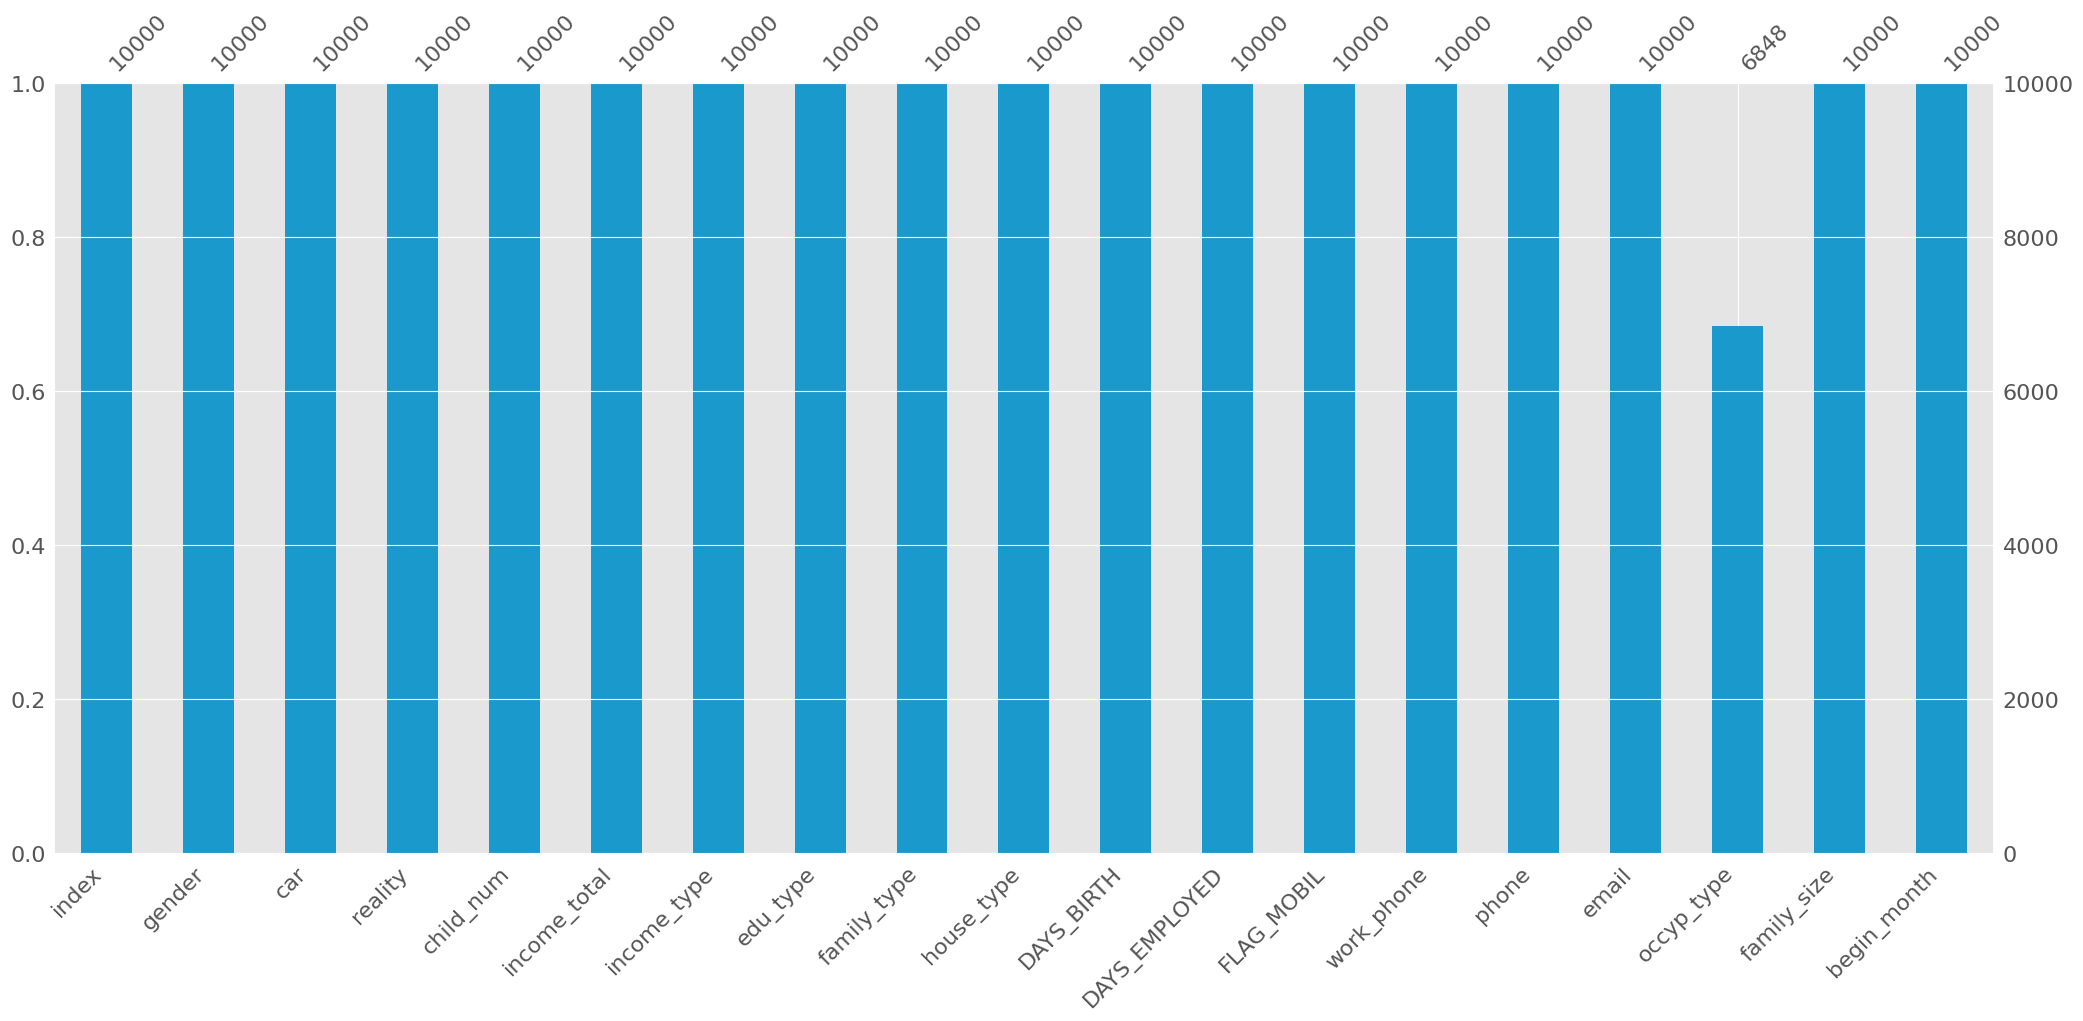

In [ ]:
plt.style.use('ggplot')
import missingno as msno
msno.bar(df=test.iloc[:, :], color=(0.1, 0.6, 0.8))

In [ ]:
exp_train = train.drop(['index','FLAG_MOBIL'],axis=1)
exp_train.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


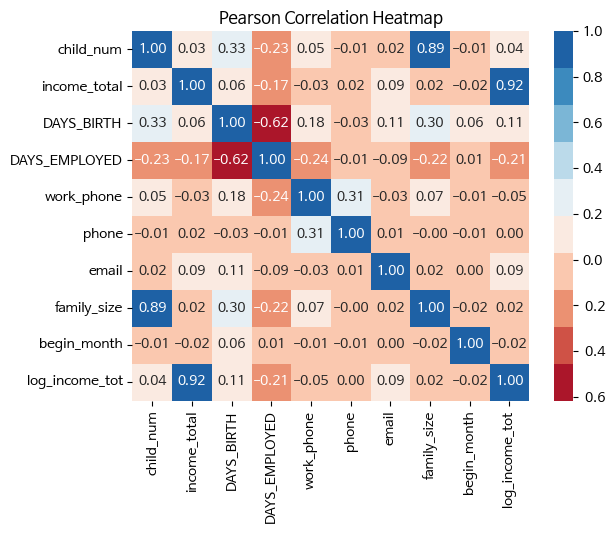

In [ ]:
diverging_colors = sns.color_palette("RdBu", 10)
corr_matrix = train.corr(method='pearson')
sns.heatmap(
    corr_matrix, annot=True, cmap=diverging_colors, fmt=".2f"
)
plt.title("Pearson Correlation Heatmap")
plt.show()

In [ ]:
train_0 = train[train['credit']==0.0]
train_1 = train[train['credit']==1.0]
train_2 = train[train['credit']==2.0]
train_member = [train_0, train_1, train_2]

def cat_plot(column):
    f, ax = plt.subplots(1, 3, figsize=(16, 6))
    for i in range(3):
        sns.countplot(x=column,
                      data=train_member[i],
                      ax=ax[i],
                      order=train_member[i][column].value_counts().index)
        ax[i].tick_params(labelsize=12)
        ax[i].set_title(f'credit = {i}')
        ax[i].set_ylabel('count')
        ax[i].tick_params(rotation=50)

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

credit 신용도

In [ ]:
train['credit'].value_counts().plot.pie(autopct='%1.1f%%',title="신용정도 비율")
sns.set_palette('deep')
plt.show()

gender 성별

In [ ]:
train['gender'].value_counts().plot.pie(autopct='%1.1f%%',title="성별비율")
plt.show()

In [ ]:
sns.countplot(data=train,x='credit',hue='gender')

In [ ]:
sns.countplot(x='gender',data=train)
plt.title("성별")
plt.ylabel("개수",size=10)
plt.show()

In [ ]:
sns.set_palette('pastel')
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.violinplot(x='credit', y='income_total', hue='gender',data=train,ax = ax1, split=True)
sns.violinplot(x='credit', y='log_income_tot', hue='gender',data=train,ax = ax2, split=True)

ax1.set_title("성별과 신용도에 따른 연간수입")
ax2.set_title("성별과 신용도에 따른 연간수입-로그변환")

plt.show()

<Axes: xlabel='credit', ylabel='income_total'>

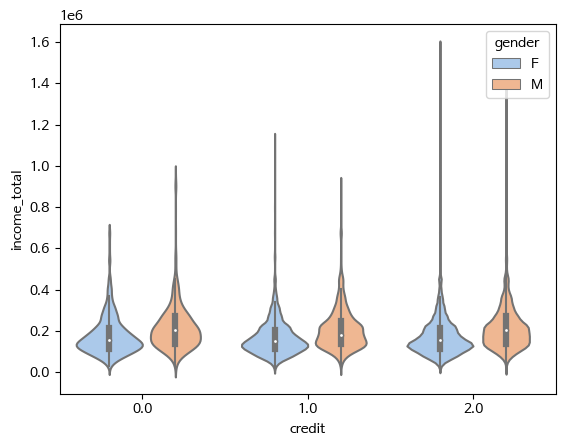

In [ ]:
sns.violinplot(x='credit', y='income_total', hue='gender',data=train,log_scale=False)

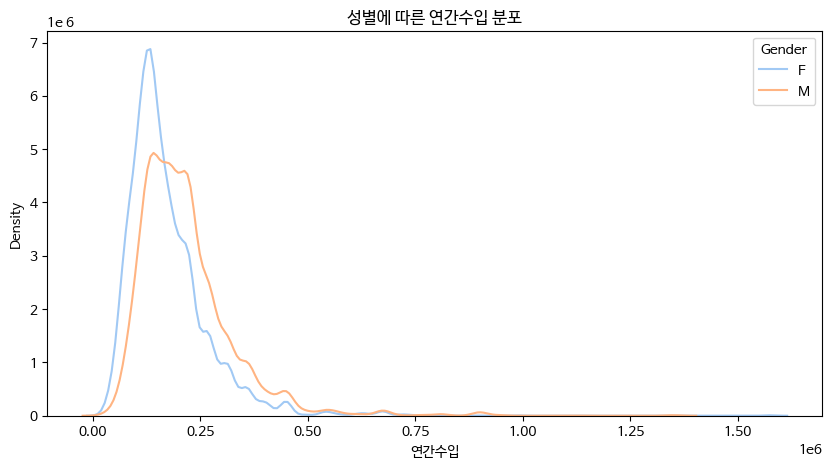

In [ ]:
plt.figure(figsize=(10, 5))
for gender, data in train.groupby('gender'):
    sns.distplot(data['income_total'], label=gender, hist=False, kde=True)

plt.title("성별에 따른 연간수입 분포")
plt.xlabel("연간수입")

plt.legend(title='Gender')

plt.show()

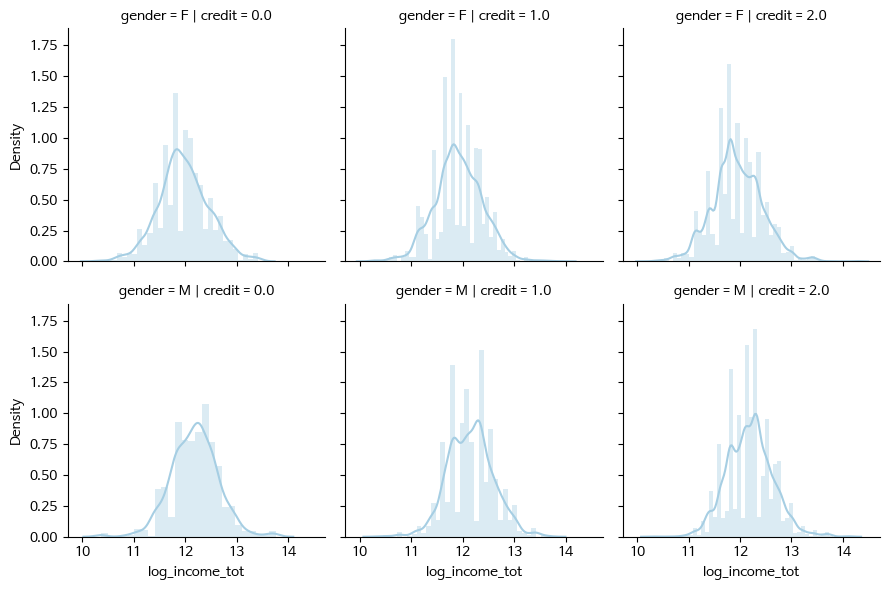

In [ ]:
g = sns.FacetGrid(train, col="credit",  row="gender")
g.map(sns.distplot,"log_income_tot")

car(차량소부여부)

In [ ]:
train['car'].groupby(train['credit']).value_counts()/26872 *100

credit  car
0.0     N       7.375707
        Y       4.614469
1.0     N      14.848169
        Y       8.473504
2.0     N      38.843406
        Y      24.300387
Name: car, dtype: float64

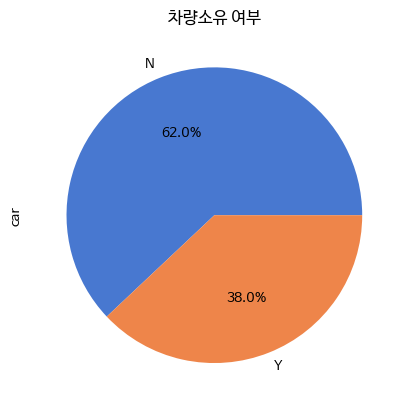

In [ ]:
train['car'].value_counts().plot.pie(autopct='%1.1f%%',title="차량소유 여부")
plt.show()

<Axes: xlabel='credit', ylabel='count'>

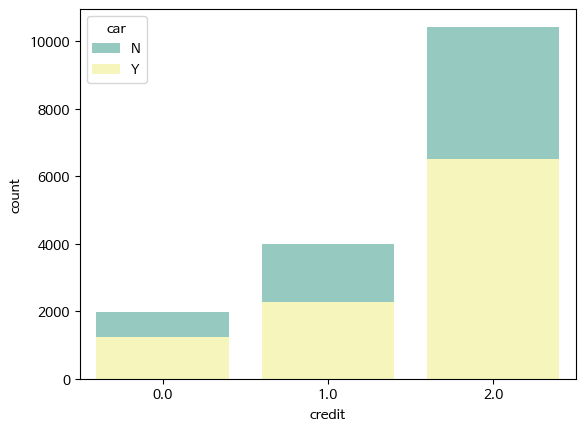

In [ ]:
sns.countplot(data=train,x='credit',hue='car',palette='Set3',dodge=False)

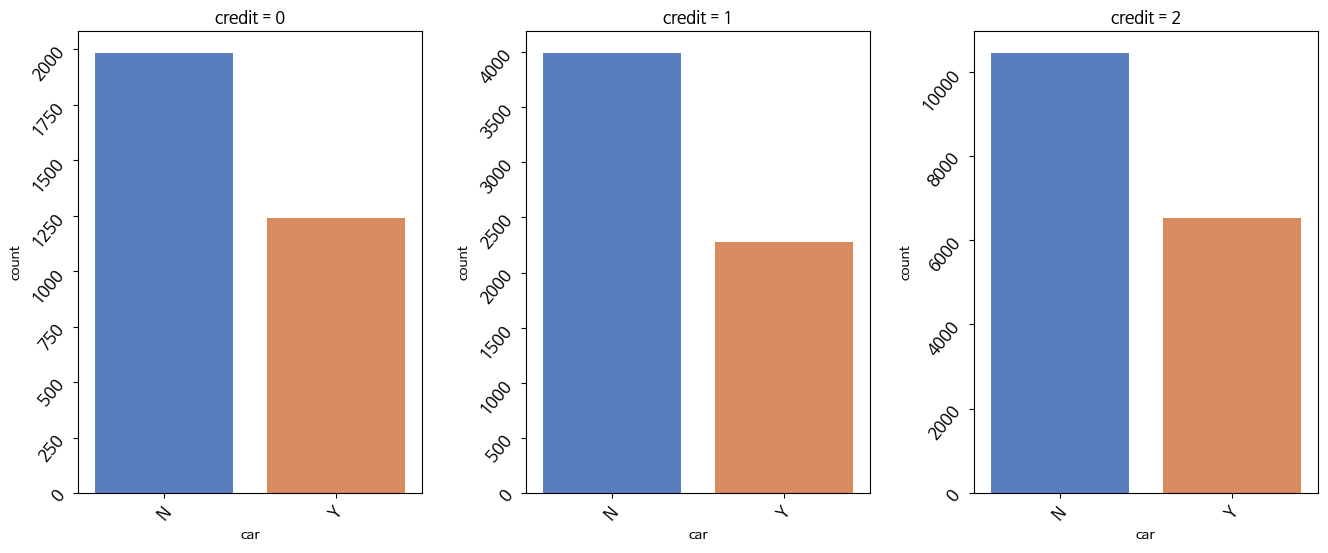

In [ ]:
cat_plot('car')

reality(부동산 소유)


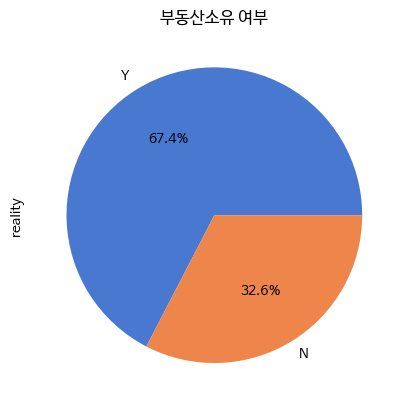

In [ ]:
train['reality'].value_counts().plot.pie(autopct='%1.1f%%',title="부동산소유 여부")
plt.show()

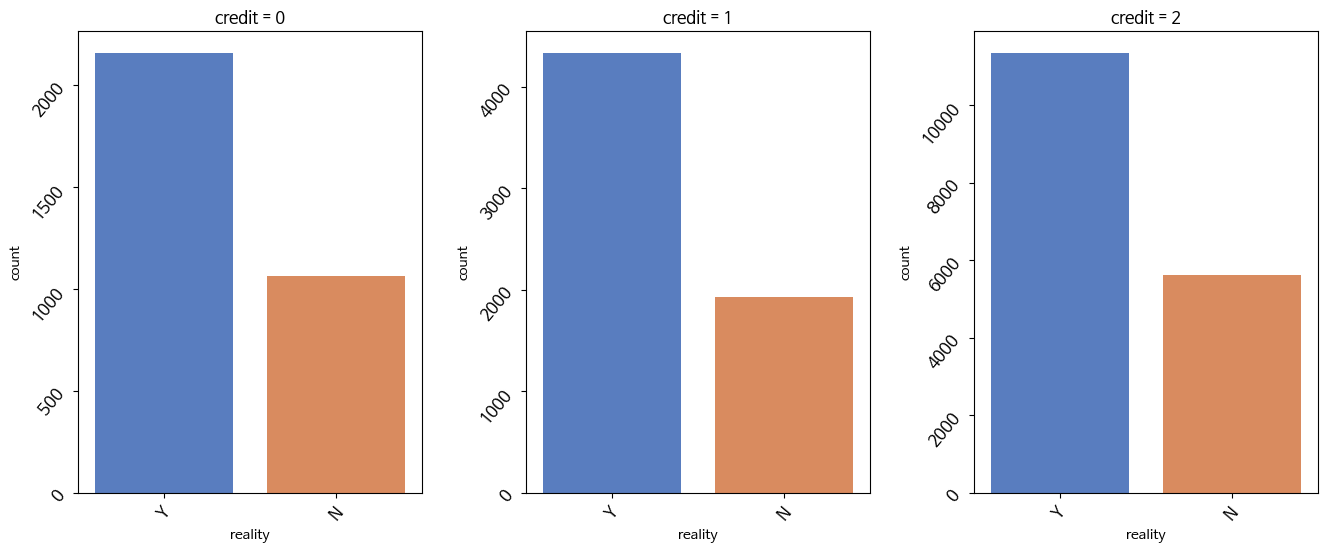

In [ ]:
cat_plot('reality')

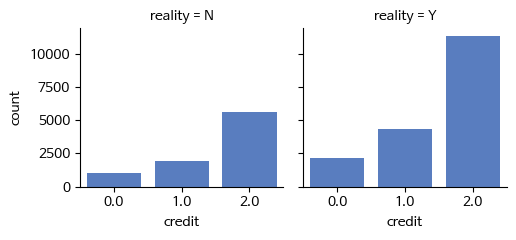

In [ ]:

g = sns.FacetGrid(train, col="reality", height=2.5, col_wrap=3)
g.map(sns.countplot, "credit")

child_num & family_size

In [ ]:
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [ ]:
test['child_num'].value_counts()

0    6861
1    2106
2     894
3     113
4      16
5      10
Name: child_num, dtype: int64

In [ ]:
train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [ ]:
test['family_size'].value_counts()

2.0    5357
1.0    1878
3.0    1789
4.0     846
5.0     106
6.0      14
7.0      10
Name: family_size, dtype: int64

<Axes: xlabel='family_size', ylabel='count'>

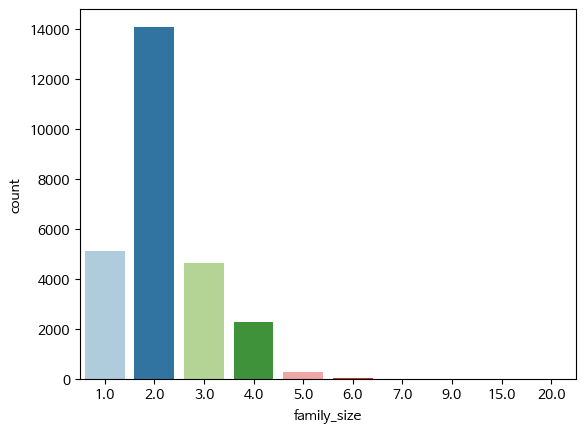

In [ ]:
sns.countplot(x='family_size',data=train)

<Axes: xlabel='credit', ylabel='count'>

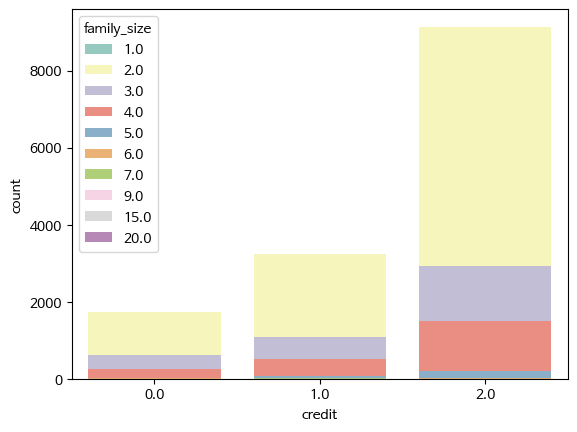

In [ ]:
sns.countplot(data=train,x='credit',hue='family_size',palette='Set3',dodge=False)

<Axes: xlabel='child_num', ylabel='count'>

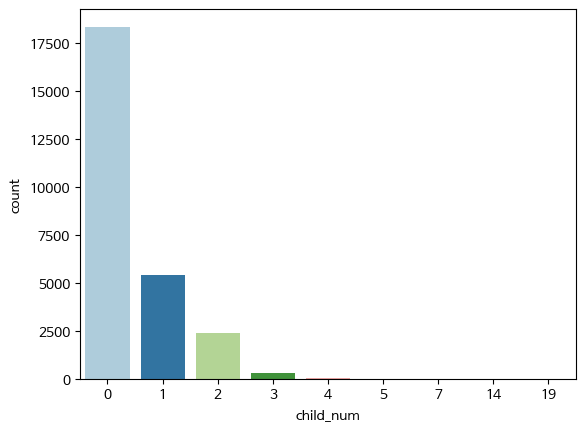

In [ ]:
sns.countplot(x='child_num',data=train)

In [ ]:
train[train['child_num']==19]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
10731,10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0,-5.0,2.0


In [ ]:
train[train['child_num']>train['family_size']]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,log_income_tot
14900,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,0,0,0,Drivers,1.0,-30.0,2.0,12.323856


income_type(소득분류)

<Axes: title={'center': '소득분류별 신용도'}, ylabel='income_type'>

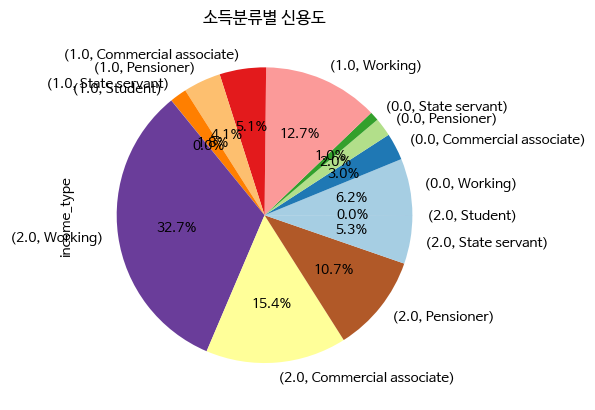

In [ ]:
train['income_type'].groupby([train['credit']]).value_counts().plot.pie(autopct='%1.1f%%',title="소득분류별 신용도")

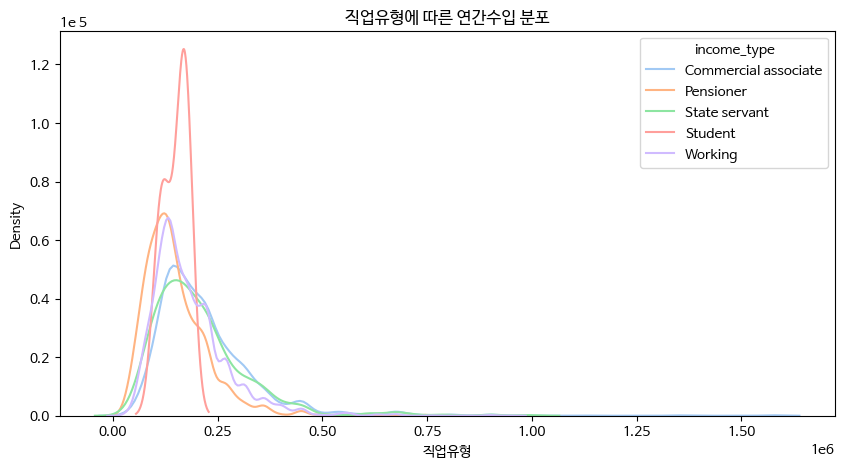

In [ ]:
plt.figure(figsize=(10, 5))
for x, data in train.groupby('income_type'):
    sns.distplot(data['income_total'], label=x, hist=False, kde=True)

plt.title("직업유형에 따른 연간수입 분포")
plt.xlabel("직업유형")

plt.legend(title='income_type')

plt.show()

<Axes: xlabel='credit', ylabel='count'>

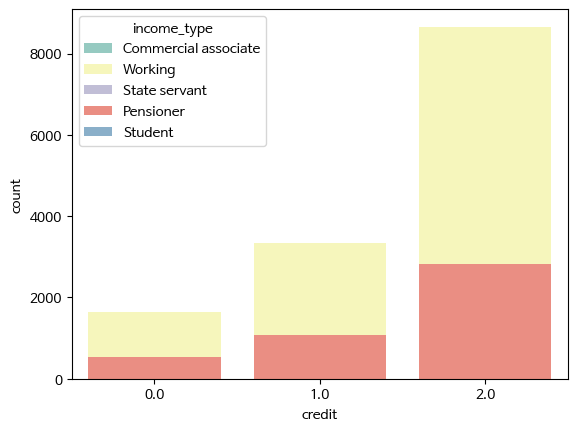

In [ ]:
sns.countplot(data=train,x='credit',hue='income_type',palette='Set3',dodge=False)

In [ ]:
train[train['income_type']=='Student']

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,log_income_tot
2990,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,0,0,1,Core staff,2.0,-60.0,2.0,12.049419
3602,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,0,0,1,Core staff,2.0,-39.0,1.0,12.049419
6223,M,N,N,0,135000.0,Student,Higher education,Single / not married,With parents,-9115,-581,0,0,1,NaN,1.0,-14.0,2.0,11.813030
8936,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,0,0,1,Core staff,2.0,-39.0,1.0,12.049419
11646,F,N,Y,1,112500.0,Student,Secondary / secondary special,Civil marriage,House / apartment,-12127,-795,0,0,0,Laborers,3.0,-12.0,2.0,11.630709
21681,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,0,0,1,Core staff,2.0,-35.0,1.0,12.049419
23119,F,N,Y,1,112500.0,Student,Secondary / secondary special,Civil marriage,House / apartment,-12127,-795,0,0,0,Laborers,3.0,-14.0,2.0,11.630709


edu_type(교육수준)

In [ ]:
train['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

<Axes: title={'center': '학위정보'}, ylabel='edu_type'>

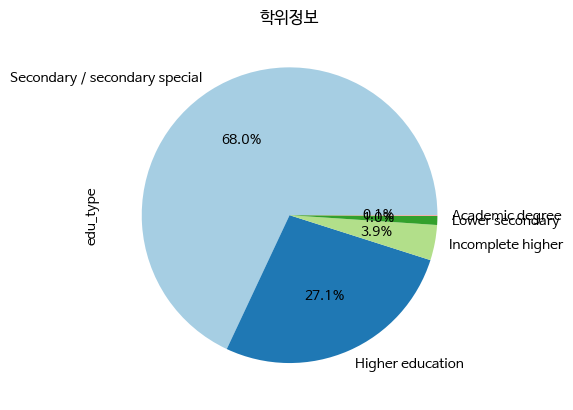

In [ ]:
train['edu_type'].value_counts().plot.pie(autopct='%1.1f%%',title="학위정보")

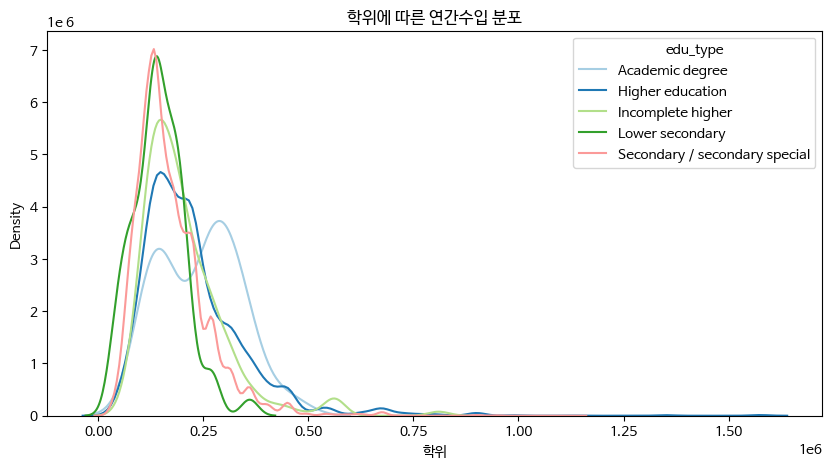

In [ ]:
plt.figure(figsize=(10, 5))
for x, data in train.groupby('edu_type'):
    sns.distplot(data['income_total'], label=x, hist=False, kde=True)

plt.title("학위에 따른 연간수입 분포")
plt.xlabel("학위")

plt.legend(title='edu_type')

plt.show()

<Axes: xlabel='credit', ylabel='count'>

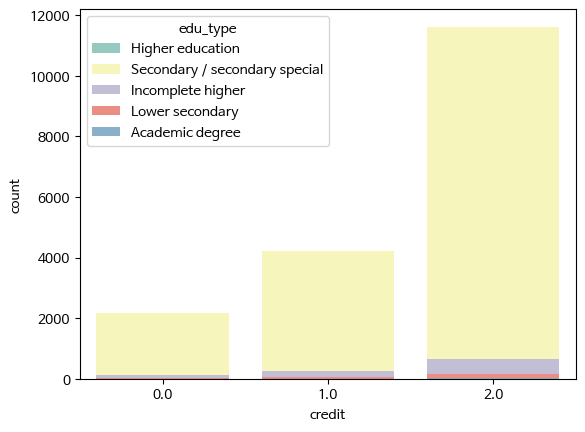

In [ ]:
sns.countplot(data=train,x='credit',hue='edu_type',palette='Set3',dodge=False)

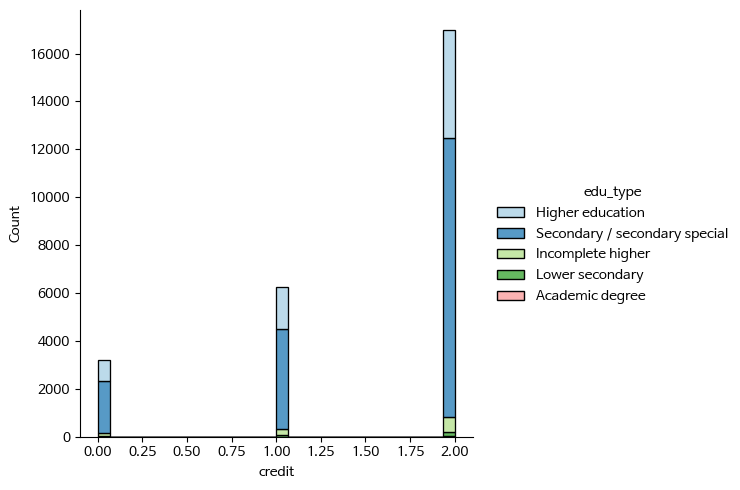

In [ ]:
sns.displot(data=train, x="credit", hue="edu_type", multiple="stack",kind='hist')

In [ ]:
train[train['edu_type']=="Academic degree"]

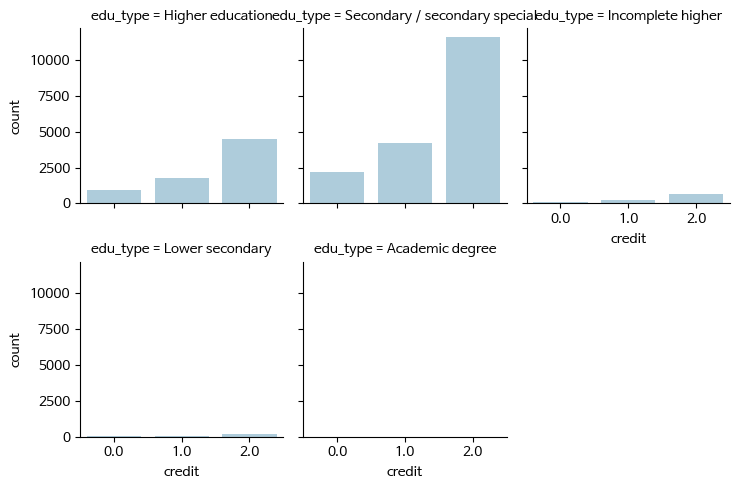

In [ ]:
g = sns.FacetGrid(train, col="edu_type", height=2.5, col_wrap=3)
g.map(sns.countplot, "credit")

[Working                 0.515743
Commercial associate    0.234418
Pensioner               0.168160
State servant           0.081415
Student                 0.000265
Name: income_type, dtype: float64]


<Axes: title={'center': '수입형태의 분포'}, ylabel='income_type'>

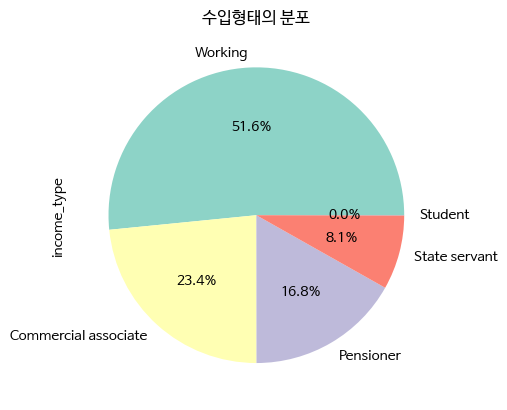

In [ ]:
income_count = [train['income_type'].value_counts()]
income_ratio = [i/26457 for i in income_count]
print(income_ratio)
train['income_type'].value_counts().plot.pie(autopct='%1.1f%%',title="수입형태의 분포")

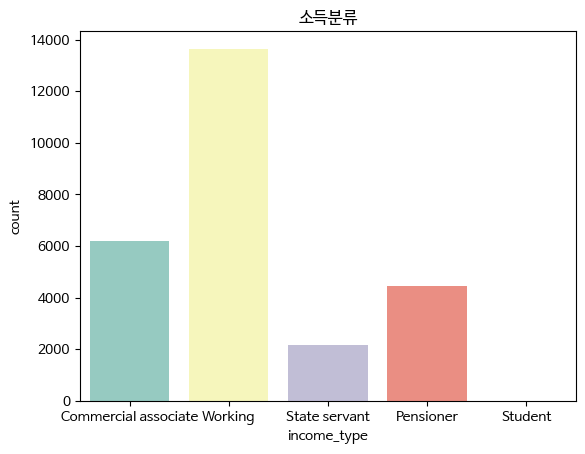

In [ ]:
sns.countplot(data=train,x='income_type')
plt.title("소득분류")
plt.show()

income_total 연간수입

Text(0.5, 1.0, '연간수입 로그변환 박스플롯')

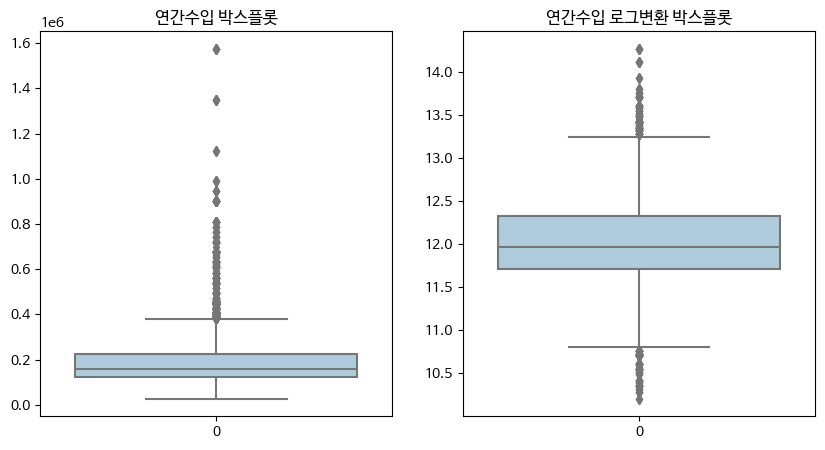

In [ ]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(train['income_total'], ax=ax1)
sns.boxplot(np.log(train["income_total"]), ax=ax2)
ax1.set_title("연간수입 박스플롯")
ax2.set_title("연간수입 로그변환 박스플롯")

Text(0.5, 1.0, '연간소득 로그변환 분포')

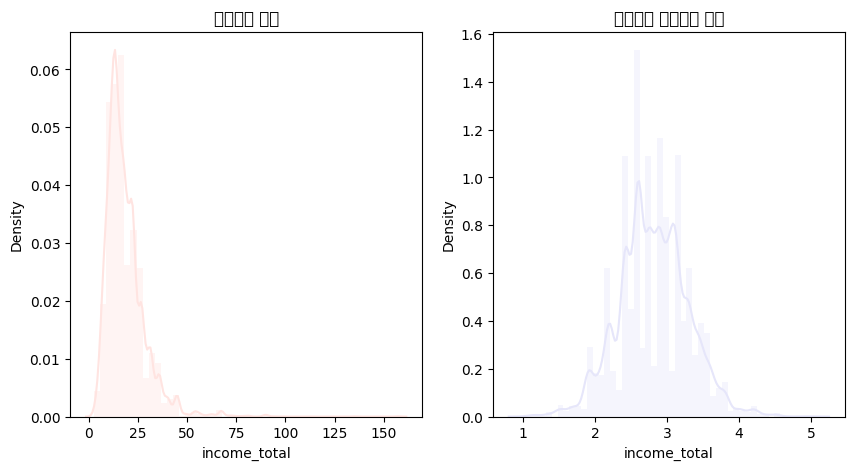

In [ ]:
#연간소득 총합의 분포(로그 변환이나 단위 변환이 필요해보임)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
qualitative_colors = sns.color_palette("Set3", 10)

sns.distplot((train['income_total']),ax=ax1,color="mistyrose")
sns.distplot(np.log(train['income_total']),ax=ax2,color='lavender') #로그변환

ax1.set_title("연간소득 분포")
ax2.set_title("연간소득 로그변환 분포")

In [ ]:
train.loc[train['income_total'] >= 75]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,DAYS_EMPLOYED_month,DAYS_EMPLOYED_week,ability,income_mean,raito_EMPLOYED,begin_year,log_income_total,personal_id,ID,occyp_is
350,0,0,1,0,78.75,2,1,1,1,17203,...,11.0,0.0,550.314465,393750.0,0.083183,0.0,13.576619,2881,6229,0
374,1,1,1,1,90.00,0,1,0,1,16923,...,0.0,2.0,354.749704,300000.0,0.149914,2.0,13.710150,7415,8912,0
959,0,0,0,0,99.00,2,1,1,1,22635,...,6.0,0.0,420.025456,495000.0,0.104131,0.0,13.805460,4934,6913,0
1656,0,1,1,1,157.50,0,1,3,1,10142,...,10.0,2.0,635.336829,787500.0,0.244429,4.0,14.269766,67,7679,0
2862,1,0,1,0,94.50,4,4,1,1,20836,...,1.0,2.0,514.145811,472500.0,0.088213,1.0,13.758940,8068,6912,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25291,1,1,0,0,135.00,0,1,1,2,12999,...,4.0,2.0,865.384615,675000.0,0.120009,2.0,14.115615,6468,1831,0
25556,1,1,1,1,81.00,0,1,1,1,18365,...,4.0,0.0,181.777379,270000.0,0.242635,2.0,13.604790,7684,8788,0
25652,1,1,1,2,90.00,0,1,1,1,9889,...,9.0,2.0,900.000000,225000.0,0.101122,0.0,13.710150,8654,9806,0
25773,1,1,0,0,135.00,0,1,1,2,12999,...,4.0,2.0,865.384615,675000.0,0.120009,3.0,14.115615,6468,1831,0


family_type 가족형태

<Axes: title={'center': '가족형태'}, ylabel='family_type'>

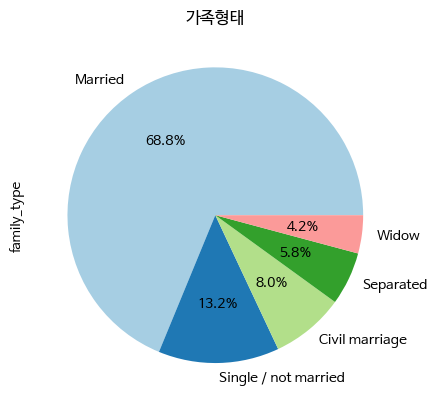

In [ ]:
train['family_type'].value_counts().plot.pie(autopct='%1.1f%%',title="가족형태")

<Axes: xlabel='family_type', ylabel='count'>

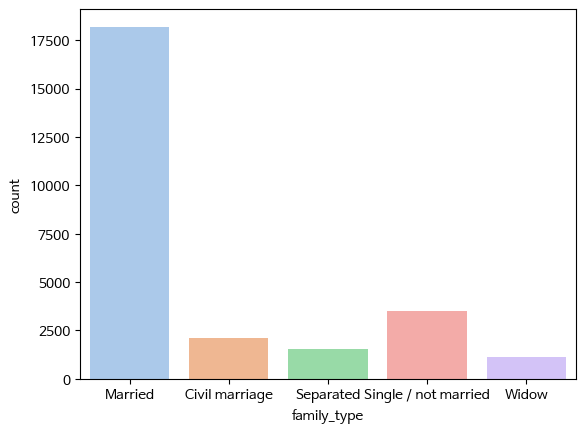

In [ ]:
sns.countplot(data=train, x = 'family_type' )

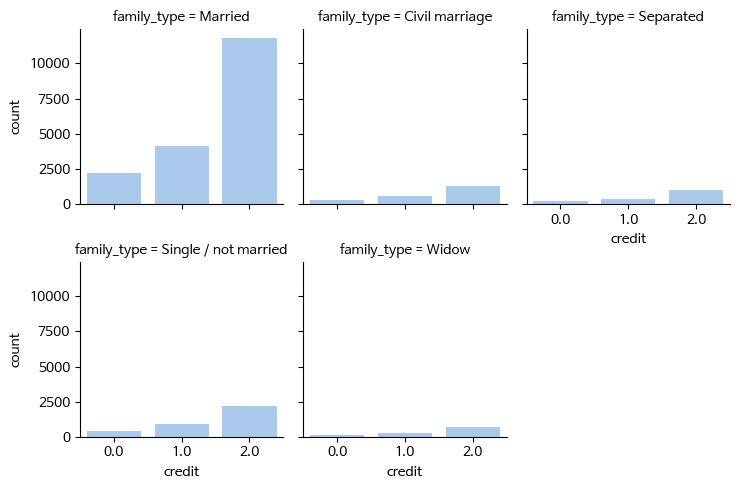

In [ ]:
g = sns.FacetGrid(train, col="family_type", height=2.5, col_wrap=3)
g.map(sns.countplot, "credit")

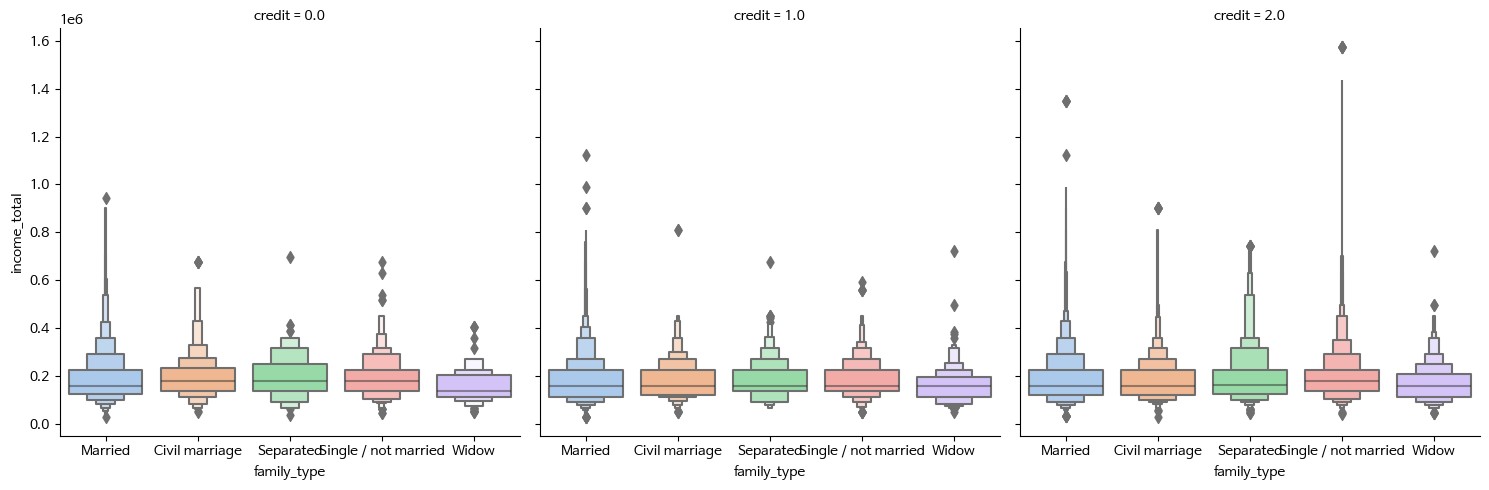

In [ ]:
sns.catplot(x='family_type', y='income_total',data=train,
            col='credit',kind="boxen")

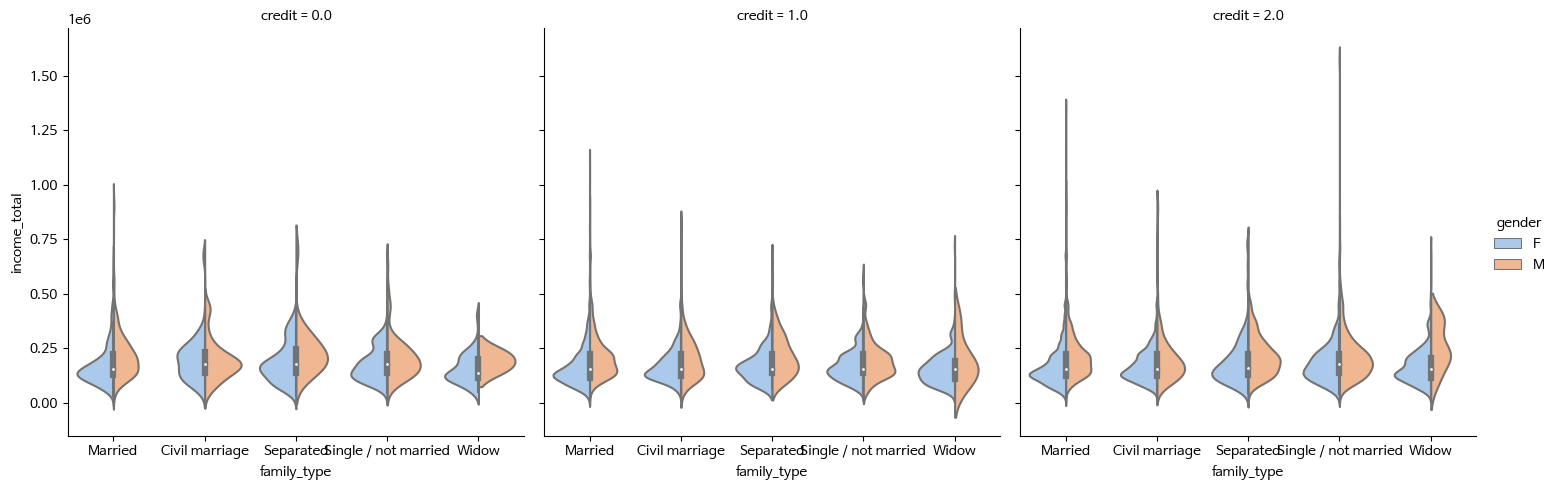

In [ ]:
sns.catplot(x='family_type', y='income_total',data=train, col = "credit",
            hue='gender',kind="violin", split=True)


house_type 주거형태

In [ ]:
train['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

<Axes: title={'center': '주거형태'}, ylabel='house_type'>

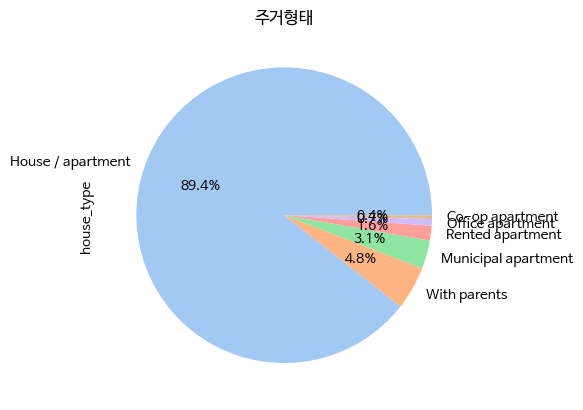

In [ ]:
train['house_type'].value_counts().plot.pie(autopct='%1.1f%%',title="주거형태")

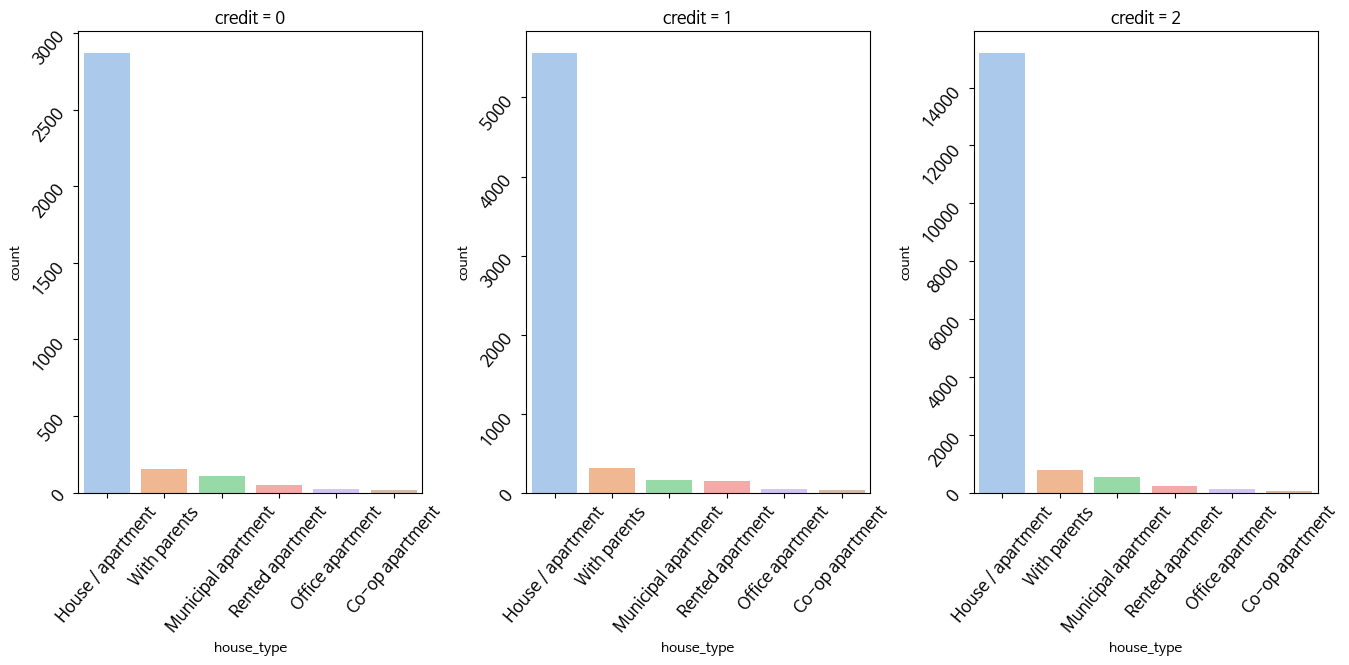

In [ ]:
cat_plot("house_type")

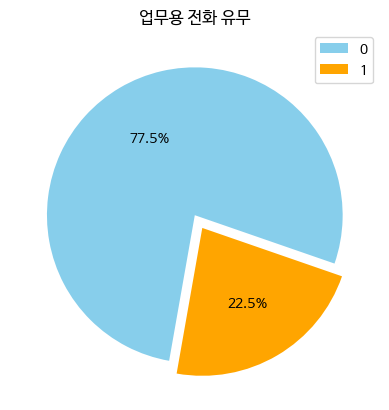

In [ ]:
explode = [0, 0.10]
counts = train['work_phone'].value_counts()

plt.pie(counts, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode,colors=['skyblue', 'orange'])
plt.legend(labels=counts.index, loc='upper right')

plt.title("업무용 전화 유무")
plt.show()

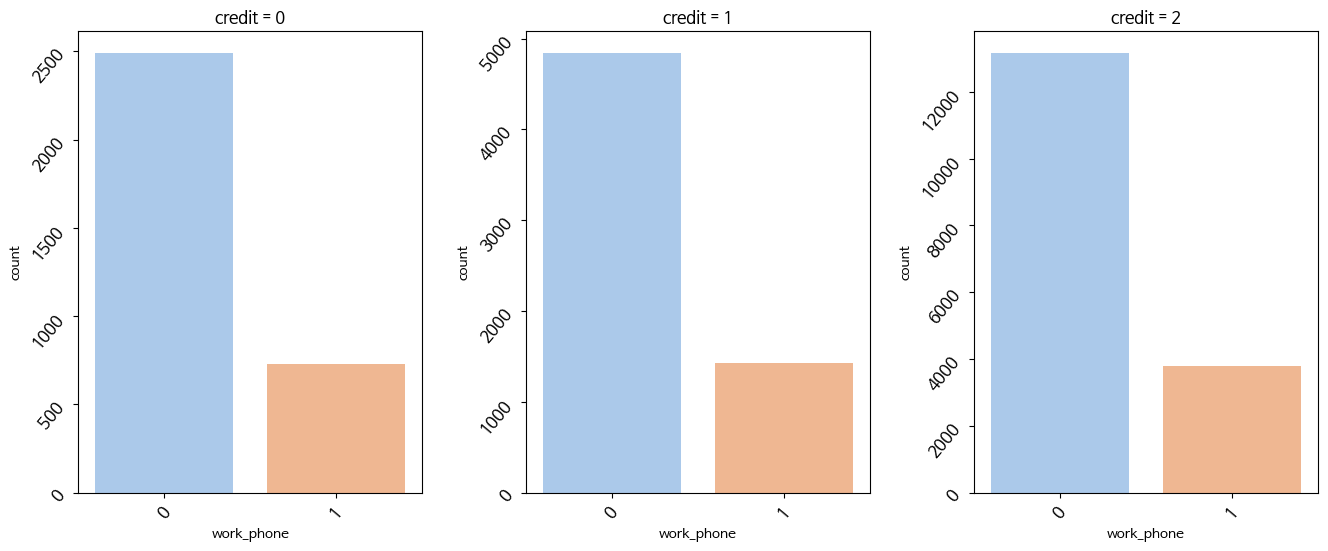

In [ ]:
cat_plot('work_phone')

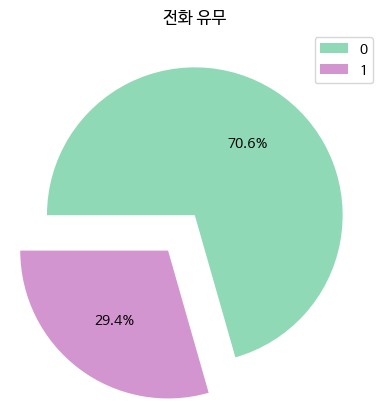

In [ ]:
explode = [0, 0.3]
counts = train['phone'].value_counts()

plt.pie(counts, autopct='%.1f%%', startangle=180, counterclock=False, explode=explode,colors=['#8fd9b6', '#d395d0'])
plt.legend(labels=counts.index, loc='upper right')

plt.title("전화 유무")
plt.show()

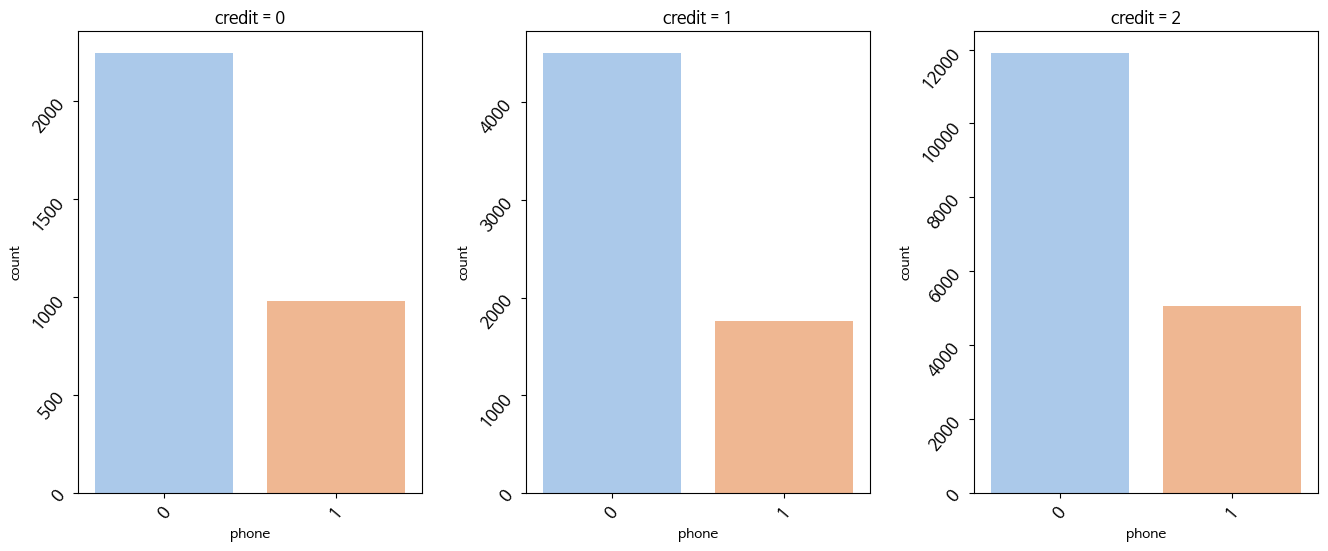

In [ ]:
cat_plot('phone')

In [ ]:
def num_plot(column):

  fig, axes = plt.subplots(1, 3, figsize=(16, 6))


  sns.distplot(train_0[column],
                ax = axes[0])
  axes[0].tick_params(labelsize=12)
  axes[0].set_title('credit = 0')
  axes[0].set_ylabel('count')

  sns.distplot(train_1[column],
                ax = axes[1])
  axes[1].tick_params(labelsize=12)
  axes[1].set_title('credit = 1')
  axes[1].set_ylabel('count')

  sns.distplot(train_2[column],
                ax = axes[2])
  axes[2].tick_params(labelsize=12)
  axes[2].set_title('credit = 2')
  axes[2].set_ylabel('count')
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

Days_BIRTH(출생일)

In [ ]:
# Numerical 그래프 함수 정의
train_0 = train[train['credit']==0.0]
train_1 = train[train['credit']==1.0]
train_2 = train[train['credit']==2.0]
def num_count_plot(column):

  fig, axes = plt.subplots(1, 3, figsize=(16, 6))


  sns.countplot(train_0[column],
                ax = axes[0])
  axes[0].tick_params(labelsize=12)
  axes[0].set_title('credit = 0')
  axes[0].set_ylabel('count')

  sns.countplot(train_1[column],
                ax = axes[1])
  axes[1].tick_params(labelsize=12)
  axes[1].set_title('credit = 1')
  axes[1].set_ylabel('count')

  sns.countplot(train_2[column],
                ax = axes[2])
  axes[2].tick_params(labelsize=12)
  axes[2].set_title('credit = 2')
  axes[2].set_ylabel('count')
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [ ]:
train[train['DAYS_BIRTH']>0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit


In [ ]:
train['DAYS_BIRTH'] = np.abs(train['DAYS_BIRTH'])
train[train['DAYS_BIRTH']<0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age


In [ ]:
train['age'] = round(train['DAYS_BIRTH'] // 365.0,0).astype(np.int32)

<Axes: xlabel='age', ylabel='Density'>

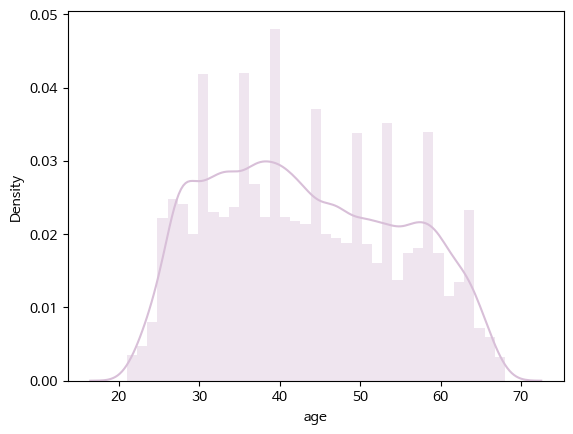

In [ ]:
sns.distplot(train['age'],color='thistle')

DAYS_EMPLOYED(업무시작일)

In [ ]:
train['DAYS_EMPLOYED'] = np.abs(train['DAYS_EMPLOYED'])

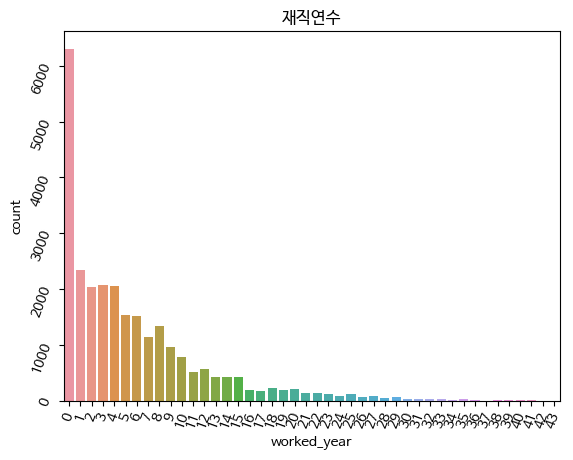

In [ ]:
train['worked_year'] = [0 if s >=0 else int(abs(s)/365) for s in train['DAYS_EMPLOYED']]
sns.countplot(data=train,x="worked_year")
plt.title('재직연수')
plt.tick_params(rotation=70)
plt.show()

<Axes: xlabel='worked_year', ylabel='Density'>

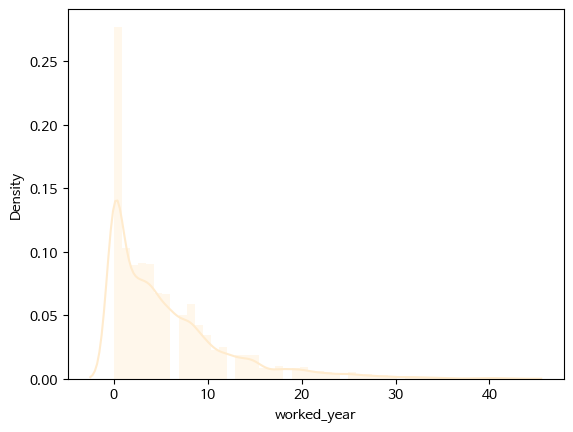

In [ ]:
sns.distplot(train['worked_year'],color='blanchedalmond')

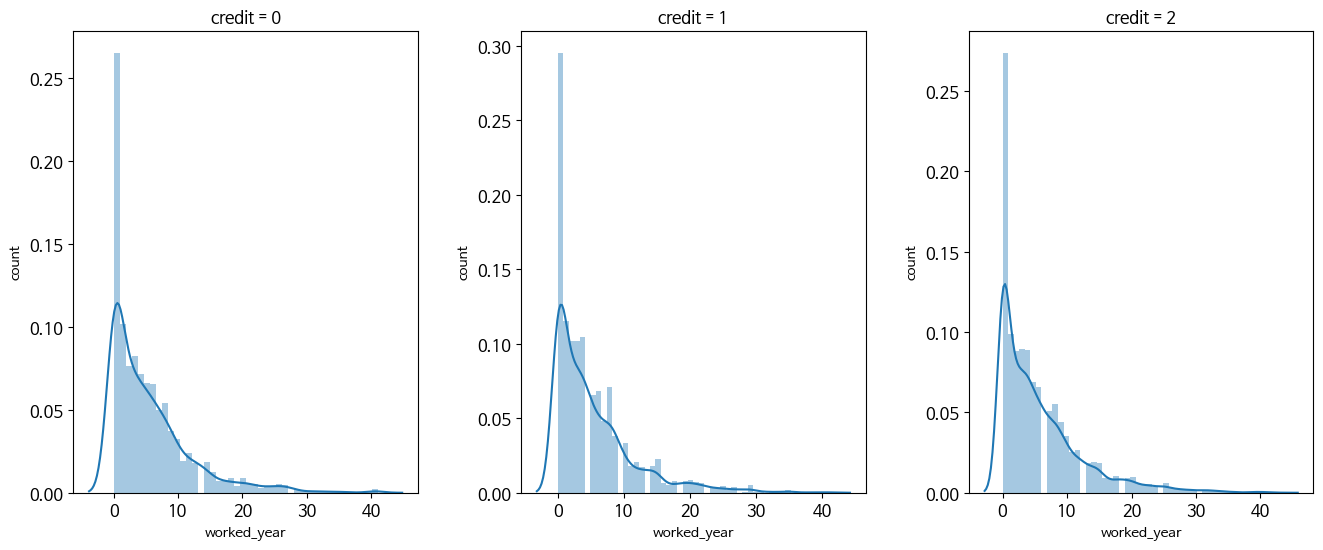

In [ ]:
num_plot('worked_year')

begin_month

In [ ]:
train[train['begin_month']>0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit


In [ ]:
train['begin_month'] = np.abs(train['begin_month'])
train_ = train.astype({'begin_month': 'int'})

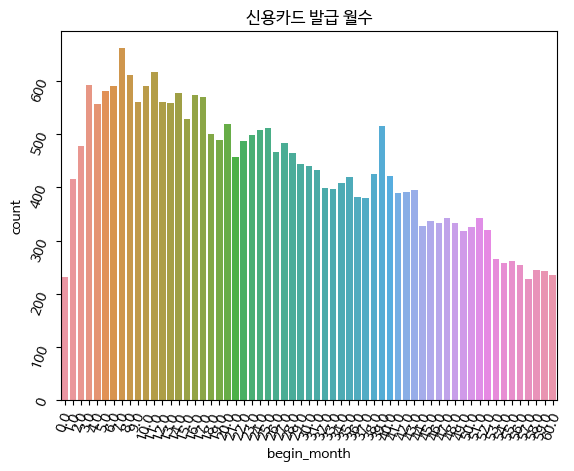

In [ ]:
sns.countplot(x='begin_month',data=train)
plt.title("신용카드 발급 월수")
plt.ylabel('count')
plt.tick_params(rotation=70)
plt.show()

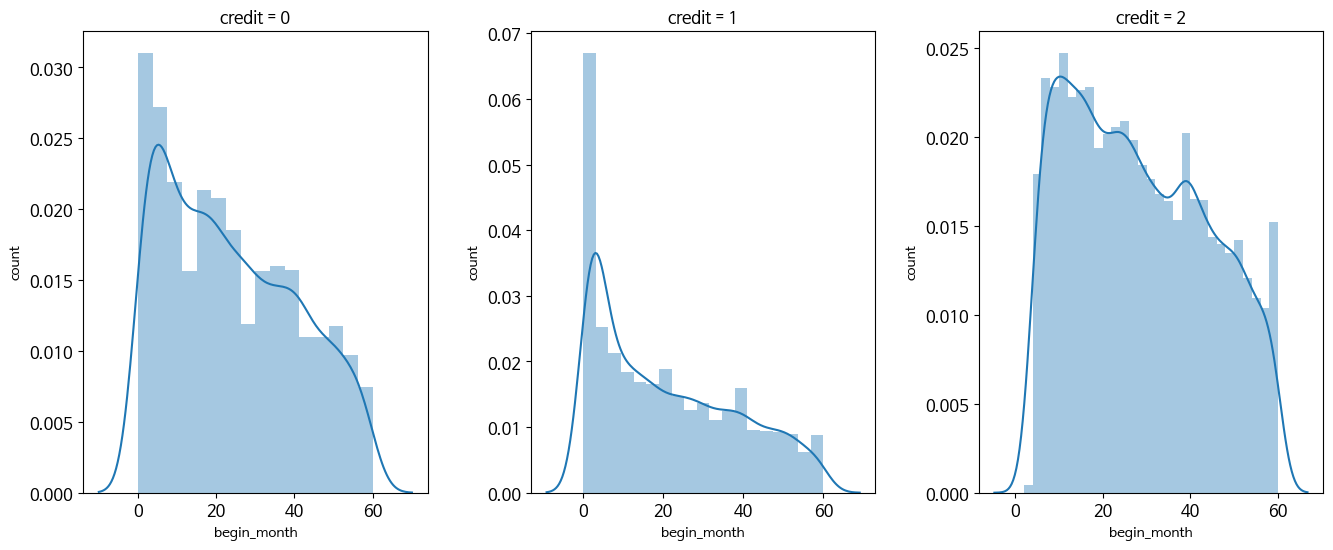

In [ ]:
num_plot('begin_month')


In [ ]:
train = train.fillna({'occyp_type':'No job'})

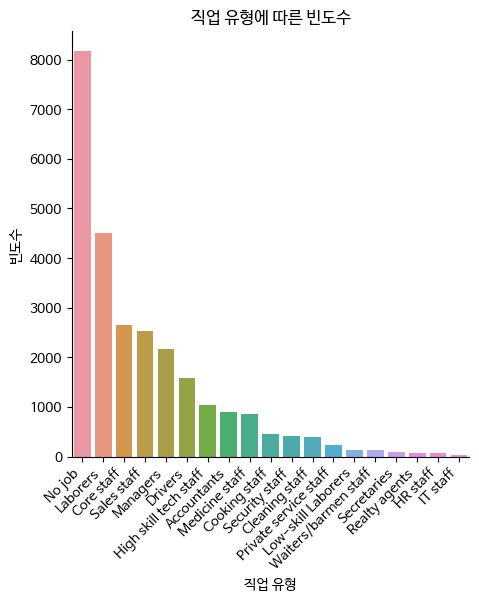

In [ ]:
sns.catplot(data=train,x='income_total',kind='',order=train['occyp_type'].value_counts().index)

# 그래프에 라벨 등 추가 설정
plt.xticks(rotation=45, ha='right')  # x 축 라벨을 오른쪽으로 45도 회전하여 표시
plt.xlabel('직업 유형')  # x 축 라벨 설정
plt.ylabel('빈도수')  # y 축 라벨 설정
plt.title('직업 유형에 따른 빈도수')  # 그래프 제목 설정

plt.show()

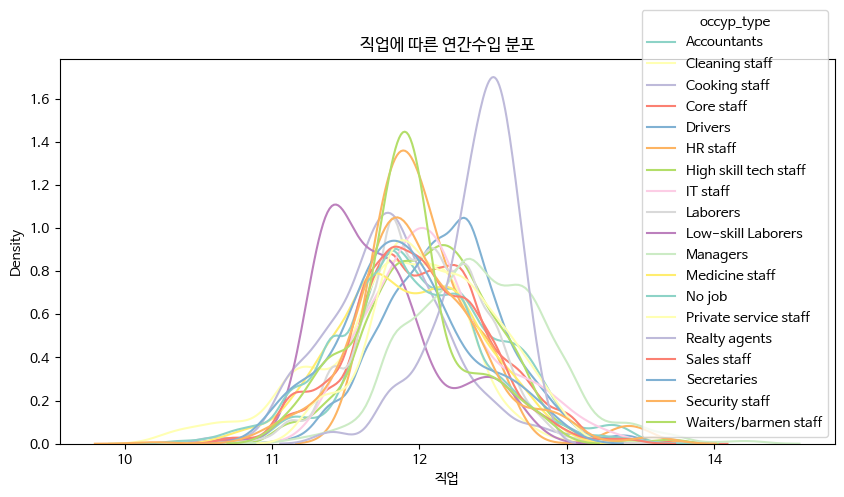

In [ ]:
plt.figure(figsize=(10, 5))
for x, data in train.groupby('occyp_type'):
    sns.distplot(data['log_income_tot'], label=x, hist=False, kde=True)

plt.title("직업에 따른 연간수입 분포")
plt.xlabel("직업")

plt.legend(title='occyp_type')

plt.show()

In [ ]:
np.log(train["income_total"]).describe()

count    26457.000000
mean        12.022067
std          0.480826
min         10.203592
25%         11.707670
50%         11.967181
75%         12.323856
max         14.269766
Name: income_total, dtype: float64

In [ ]:
train['log_income_tot'] = np.log(train['income_total'])
train[train['log_income_tot']>13.5]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,phone,email,occyp_type,family_size,begin_month,credit,DAYS_BIRTH_bin,begin_month_bin,DAYS_EMPLOYED_bin,log_income_tot
350,F,N,Y,0,787500.0,State servant,Higher education,Married,House / apartment,17203,...,0,1,Managers,2.0,1.0,1.0,4,0,1,13.576619
374,M,Y,Y,1,900000.0,Commercial associate,Higher education,Civil marriage,House / apartment,16923,...,0,0,High skill tech staff,3.0,26.0,2.0,4,3,2,13.710150
959,F,N,N,0,990000.0,State servant,Higher education,Married,House / apartment,22635,...,1,0,Core staff,2.0,7.0,2.0,6,7,2,13.805460
1656,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,10142,...,0,0,Managers,2.0,50.0,2.0,5,5,2,14.269766
2862,M,N,Y,0,945000.0,Working,Secondary / secondary special,Married,House / apartment,20836,...,0,0,Managers,2.0,17.0,0.0,8,4,2,13.758940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25556,M,Y,Y,1,810000.0,Commercial associate,Higher education,Married,House / apartment,18365,...,1,1,NaN,3.0,24.0,2.0,2,1,0,13.604790
25652,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,9889,...,0,0,Managers,4.0,7.0,2.0,5,7,1,13.710150
25773,M,Y,N,0,1350000.0,Commercial associate,Higher education,Married,Municipal apartment,12999,...,1,1,Managers,2.0,45.0,2.0,0,9,1,14.115615
26204,F,Y,Y,0,742500.0,Pensioner,Higher education,Separated,House / apartment,21792,...,0,0,NaN,1.0,26.0,2.0,6,3,1,13.517778


# 전처리

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DNA 프로젝트/신용카드 사용자 연체 예측 AI  경진대회 data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DNA 프로젝트/신용카드 사용자 연체 예측 AI  경진대회 data/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DNA 프로젝트/신용카드 사용자 연체 예측 AI  경진대회 data/sample_submission.csv")

In [ ]:
##필요없는 변수 제거
train = train.drop(['index','FLAG_MOBIL'],axis=1)
test = test.drop(['index','FLAG_MOBIL'],axis=1)

날짜 변수

In [ ]:
#양수 변환
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(lambda x: 0 if x >= 0 else x)
train[['begin_month','DAYS_EMPLOYED','DAYS_BIRTH']] = train[['begin_month','DAYS_EMPLOYED','DAYS_BIRTH']].apply(abs)

test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(lambda x: 0 if x >= 0 else x)
test[['begin_month','DAYS_EMPLOYED','DAYS_BIRTH']] = test[['begin_month','DAYS_EMPLOYED','DAYS_BIRTH']].apply(abs)

In [ ]:
# 구간화 함수 제작
def make_bin(df, variable, n):

    data = df
    count, bin_dividers = np.histogram(data[variable], bins=n)
    bin_names=[str(i) for i in range(n)]
    data['%s_bin' % variable] = pd.cut(x=data[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    data['%s_bin' % variable] = pd.factorize(data['%s_bin' % variable])[0]

    return data

In [ ]:
# DAYS_BIRTH
train = make_bin(train, 'DAYS_BIRTH', n=10)
test = make_bin(test, 'DAYS_BIRTH', n=10)

In [ ]:

train = make_bin(train, 'begin_month', n=10)
test = make_bin(test, 'begin_month', n=10)

In [ ]:
# DAYS_EMPLOYED
train = make_bin(train, 'DAYS_EMPLOYED', n=10)
test = make_bin(test, 'DAYS_EMPLOYED', n=10)

이상치 처리

In [ ]:
  #아이의 수 5를 기준으로 초과인 행 삭제
train= train[(train['family_size'] <= 7)] # 가족 수가 7 초과인 것들 삭제
train = train.reset_index(drop=True) # 새롭게 초기화 배열

test= test[(train['family_size'] <= 7)] # 가족 수가 7 초과인 것들 삭제
test = test.reset_index(drop=True) # 새롭게 초기화 배열

파생변수 생성

In [ ]:
# [train,test] 대입

for df in [train, test] :

    df['g_r_c'] = df['gender'].astype(str) + "_" + df['reality'].astype(str) +"_" + df['car'].astype(str)

    df['e_p_w'] = df['email'].astype(str) + "_"+ df['phone'].astype(str) + "_" + df['work_phone'].astype(str)

   # [1] before_EMPLOYED : 고용되기 전까지의 일수 (고용비율)
    df['before_EMPLOYED'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED']
    # [2] income_total_befofeEMP_ratio : 연간 소득 중 고용되기 전까지의 비율
    df['income_total_befofeEMP_ratio'] = df['income_total'] / df['before_EMPLOYED']

    df['befor_EMPLOYED_year'] = df['before_EMPLOYED'] // 360

    # [4] before_EMPLOYED_month : 고용된 몇 월
    df['before_EMPLOYED_month'] = np.floor(df['before_EMPLOYED'] / 30) - ((np.floor(df['before_EMPLOYED'] / 30) / 12).astype(int) * 12)

    # [5] before_EMPLOYED_week : 고용된 몇째 주
    df['before_EMPLOYED_week'] = np.floor(df['before_EMPLOYED'] / 7) - ((np.floor(df['before_EMPLOYED'] / 7) / 4).astype(int) * 4)

    # [6] Age : 나이
    df['Age'] = df['DAYS_BIRTH'] // 360

    # [7] DAYS_BIRTH_month : 태어난 월 (출생연도의 n월)
    df['DAYS_BIRTH_month'] = np.floor(df['DAYS_BIRTH'] / 30) - ((np.floor(df['DAYS_BIRTH'] / 30) / 12).astype(int) * 12)

    # [8] DAYS_BIRTH_week : 태어난 주 (출생연도의 n주차)
    df['DAYS_BIRTH_week'] = np.floor(df['DAYS_BIRTH'] / 7) - ((np.floor(df['DAYS_BIRTH'] / 7) / 4).astype(int) * 4)

    # [9] EMPLOYED : 근속연수
    df['EMPLOYED'] = df['DAYS_EMPLOYED'] // 360

    # [10] DAYS_EMPLOYED_month : 고용된 달 (고용연도의 n월)
    df['DAYS_EMPLOYED_month'] = np.floor(df['DAYS_EMPLOYED'] / 30) - ((np.floor(df['DAYS_EMPLOYED'] / 30) / 12).astype(int) * 12)

    # [11] DAYS_EMPLOYED_week : 고용된 주 (고용연도의 n주차)
    df['DAYS_EMPLOYED_week'] = np.floor(df['DAYS_EMPLOYED'] / 7) - ((np.floor(df['DAYS_EMPLOYED'] / 7) / 4).astype(int) * 4)

    # [12] income_mean : 소득 / 가족 수 (인당 평균 부양비)
    df['income_mean'] = df['income_total'] / df['family_size']

    # [13] : raito_EMPLOYED (인생의 일한 비율)
    df['ratio_EMPLOYED'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']

    # [15] ID 생성 {2번째 방법} [train_df['ID'].value_counts()]
    df['ID'] = \
    df['child_num'].astype(str) + '_' + df['income_total'].astype(str) + '_' +\
    df['DAYS_BIRTH'].astype(str) + '_' + df['DAYS_EMPLOYED'].astype(str) + '_' +\
    df['work_phone'].astype(str) + '_' + df['phone'].astype(str) + '_' +\
    df['email'].astype(str) + '_' + df['family_size'].astype(str) + '_' +\
    df['gender'].astype(str) + '_' + df['car'].astype(str) + '_' +\
    df['reality'].astype(str) + '_' + df['income_type'].astype(str) + '_' +\
    df['edu_type'].astype(str) + '_' + df['family_type'].astype(str) + '_' +\
    df['house_type'].astype(str) + '_' + df['occyp_type'].astype(str)

    del_cols = [
        "gender",
        "car",
        "reality",
        "email",
        "phone",
        "work_phone", "child_num"]

    df.drop(del_cols, axis=1, inplace=True)



## 결측치 처리 ##

In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=e40d91fb0d96cd73fd772d53f749d89460f3479e489fcb830e9a278a869e099c
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=ae3c84acad05841ce9f563ef8cd0f2322cdd712cfbea26f91993c28a36db92b8
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
impute_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/신용카드 사용자 연체 예측 AI  경진대회 data/train.csv")
impute_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/신용카드 사용자 연체 예측 AI  경진대회 data/test.csv")

In [ ]:
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder

In [ ]:

# 'income_type'이 'Pensioner'이고 'DAYS_EMPLOYED'가 0 이상인 행에 대해 'occyp_type'을 "No job"으로 설정
train.loc[(train['income_type']=='Pensioner')&(train['DAYS_EMPLOYED']>=0), 'occyp_type'] = "No job"
test.loc[(test['income_type']=='Pensioner')&(test['DAYS_EMPLOYED']>=0), 'occyp_type'] = "No job"

# OrdinalEncoder 및 KNN imputer를 초기화
encoder = OrdinalEncoder()
imputer = KNN()

# 인코딩할 범주형 열을 지정 [결측값을 가장 잘 설명할 수 있는 범주형 변수라고 생각]
cat_cols = ['occyp_type','edu_type', 'income_type']

# 범주형 데이터를 인코딩하는 함수를 정의
def encode(data):
    # 누락된 값을 제외하고 유지
    nonulls = np.array(data.dropna())
    # 인코딩을 위해 데이터를 다시 구성
    impute_reshape = nonulls.reshape(-1,1)
    # OrdinalEncoder를 사용하여 데이터를 인코딩
    impute_ordinal = encoder.fit_transform(impute_reshape)
    # 원본 데이터에서 누락된 값에 다시 인코딩된 값을 할당
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)

    return data

# 훈련 및 테스트 데이터의 범주형 열에 인코딩을 적용
for columns in cat_cols:
    train[columns] = encode(train[columns])
    test[columns] = encode(test[columns])

# 훈련 및 테스트 데이터의 선택된 열에 대해 누락된 값을 채우기 위해 KNN imputation을 적용
impute_train = train[['edu_type','income_type','income_total','occyp_type']]
impute_test = test[['edu_type','income_type','income_total','occyp_type']]

# KNN imputation을 적용하여 선택된 열의 누락된 값을 채움
encode_train_data = pd.DataFrame(np.round(imputer.fit_transform(impute_train)),columns=['edu_type','income_type','income_total','occyp_type'])
encode_test_data = pd.DataFrame(np.round(imputer.fit_transform(impute_test)),columns=['edu_type','income_type','income_total','occyp_type'])

# 원래 'occyp_type' 열을 대체된 값으로 교체
train['occyp_type'] = encode_train_data['occyp_type']
test['occyp_type'] = encode_test_data['occyp_type']

# 대체 후 'occyp_type' 열에 남아있는 누락된 값의 개수를 출력
print(train['occyp_type'].isnull().sum())  # train_df에서 남아있는 결측값 개수 확인
print(test['occyp_type'].isnull().sum())   # test_df에서 남아있는 결측값 개수 확인

Imputing row 1/26451 with 1 missing, elapsed time: 131.619
Imputing row 101/26451 with 0 missing, elapsed time: 131.660
Imputing row 201/26451 with 0 missing, elapsed time: 131.664
Imputing row 301/26451 with 0 missing, elapsed time: 131.668
Imputing row 401/26451 with 0 missing, elapsed time: 131.673
Imputing row 501/26451 with 0 missing, elapsed time: 131.676
Imputing row 601/26451 with 1 missing, elapsed time: 131.679
Imputing row 701/26451 with 0 missing, elapsed time: 131.683
Imputing row 801/26451 with 0 missing, elapsed time: 131.686
Imputing row 901/26451 with 0 missing, elapsed time: 131.690
Imputing row 1001/26451 with 0 missing, elapsed time: 131.693
Imputing row 1101/26451 with 1 missing, elapsed time: 131.697
Imputing row 1201/26451 with 0 missing, elapsed time: 131.700
Imputing row 1301/26451 with 0 missing, elapsed time: 131.704
Imputing row 1401/26451 with 0 missing, elapsed time: 131.706
Imputing row 1501/26451 with 0 missing, elapsed time: 131.710
Imputing row 1601/26

## 결측치 처리 (2) ##

In [ ]:
train.loc[(train['income_type']=='Pensioner')&(train['DAYS_EMPLOYED']>=0), 'occyp_type'] = "retire"
test.loc[(test['income_type']=='Pensioner')&(test['DAYS_EMPLOYED']>=0), 'occyp_type'] = "retire"

In [ ]:
train['occyp_type'].fillna("No job", inplace=True)
test['occyp_type'].fillna("No job", inplace=True)

In [ ]:
for df in [train,test]:
  df['occyp_is'] = 0
  df.loc[df['occyp_type']=="retire", "occyp_is"] = 1
  df['occyp_is']=df['occyp_is'].astype(object)

## 인코딩&정규화 ##

In [ ]:
# 'object' 자료형과 숫자형 자료형을 나누는 부분
object_columns = train.select_dtypes(include=['object']).columns
numeric_columns = train.select_dtypes(exclude=['object']).columns

# 결과 출력
print("Object 변수:")
print(object_columns)


print("\n숫자형 변수:")
print(numeric_columns)

Object 변수:
Index(['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type',
       'g_r_c', 'e_p_w', 'ID', 'occyp_is'],
      dtype='object')

숫자형 변수:
Index(['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size',
       'begin_month', 'credit', 'DAYS_BIRTH_bin', 'begin_month_bin',
       'DAYS_EMPLOYED_bin', 'before_EMPLOYED', 'income_total_befofeEMP_ratio',
       'befor_EMPLOYED_year', 'before_EMPLOYED_month', 'before_EMPLOYED_week',
       'Age', 'DAYS_BIRTH_month', 'DAYS_BIRTH_week', 'EMPLOYED',
       'DAYS_EMPLOYED_month', 'DAYS_EMPLOYED_week', 'income_mean',
       'ratio_EMPLOYED'],
      dtype='object')


In [ ]:
 train.select_dtypes(include=['int64']).columns

Index(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_BIRTH_bin', 'begin_month_bin',
       'DAYS_EMPLOYED_bin', 'before_EMPLOYED', 'befor_EMPLOYED_year', 'Age',
       'EMPLOYED'],
      dtype='object')

In [ ]:
train['ID2'] = train['ID']

In [ ]:
# train encoding

from sklearn.preprocessing import LabelEncoder
train_cats = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'g_r_c', 'e_p_w', 'ID','occyp_is']
cats = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'g_r_c', 'e_p_w',
        'occyp_is']
for x in train_cats:
  encoder = LabelEncoder()
  encoder.fit(train[x])
  labels_train = encoder.transform(train[x])
  train[x] = labels_train


In [ ]:
for i in range(len(test['ID'])):
    if test.loc[i, 'ID'] in train['ID2'].values:
        test.loc[i, 'ID'] = train.loc[train['ID2'] == test.loc[i, 'ID'], 'ID'].values[0]
    else:
       test.loc[i, 'ID'] = -1

In [ ]:
cats = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'g_r_c', 'e_p_w',
        'occyp_is']
for x in cats:
  encoder = LabelEncoder()
  encoder.fit(test[x])
  labels = encoder.transform(test[x])
  test[x] = labels


In [ ]:
train.drop(['ID2'],axis=1,inplace=True)

정규화

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26451 entries, 0 to 26450
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   child_num                     26451 non-null  int64  
 1   income_total                  26451 non-null  float64
 2   income_type                   26451 non-null  int64  
 3   edu_type                      26451 non-null  int64  
 4   family_type                   26451 non-null  int64  
 5   house_type                    26451 non-null  int64  
 6   DAYS_BIRTH                    26451 non-null  int64  
 7   DAYS_EMPLOYED                 26451 non-null  int64  
 8   occyp_type                    26451 non-null  int64  
 9   family_size                   26451 non-null  float64
 10  begin_month                   26451 non-null  float64
 11  credit                        26451 non-null  object 
 12  DAYS_BIRTH_bin                26451 non-null  int64  
 13  b

In [ ]:
train['income_total'] = np.log1p(train[['income_total']])
test['income_total'] = np.log1p(test[['income_total']])

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
selected_columns = ['income_total','DAYS_BIRTH', 'DAYS_EMPLOYED',
                    'family_size', 'begin_month', 'before_EMPLOYED',
                   'income_total_befofeEMP_ratio',
                   'before_EMPLOYED_month', 'before_EMPLOYED_week', 'Age',
                   'DAYS_BIRTH_month', 'DAYS_BIRTH_week', 'EMPLOYED',
                   'DAYS_EMPLOYED_month', 'DAYS_EMPLOYED_week', 'income_mean',
                   'ratio_EMPLOYED']

train[selected_columns] = scaler.fit_transform(train[selected_columns])

test[selected_columns]= scaler.transform(test[selected_columns])

## 전처리 마무리 및 확인 ##

In [ ]:
test.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'DAYS_BIRTH_bin',
       'begin_month_bin', 'DAYS_EMPLOYED_bin', 'before_EMPLOYED',
       'income_total_befofeEMP_ratio', 'before_EMPLOYED_year',
       'before_EMPLOYED_month', 'before_EMPLOYED_week', 'Age',
       'DAYS_BIRTH_month', 'DAYS_BIRTH_week', 'EMPLOYED',
       'DAYS_EMPLOYED_month', 'DAYS_EMPLOYED_week', 'income_mean',
       'raito_EMPLOYED', 'begin_year', 'ID'],
      dtype='object')

In [ ]:
test['ID']=test['ID'].astype('int')

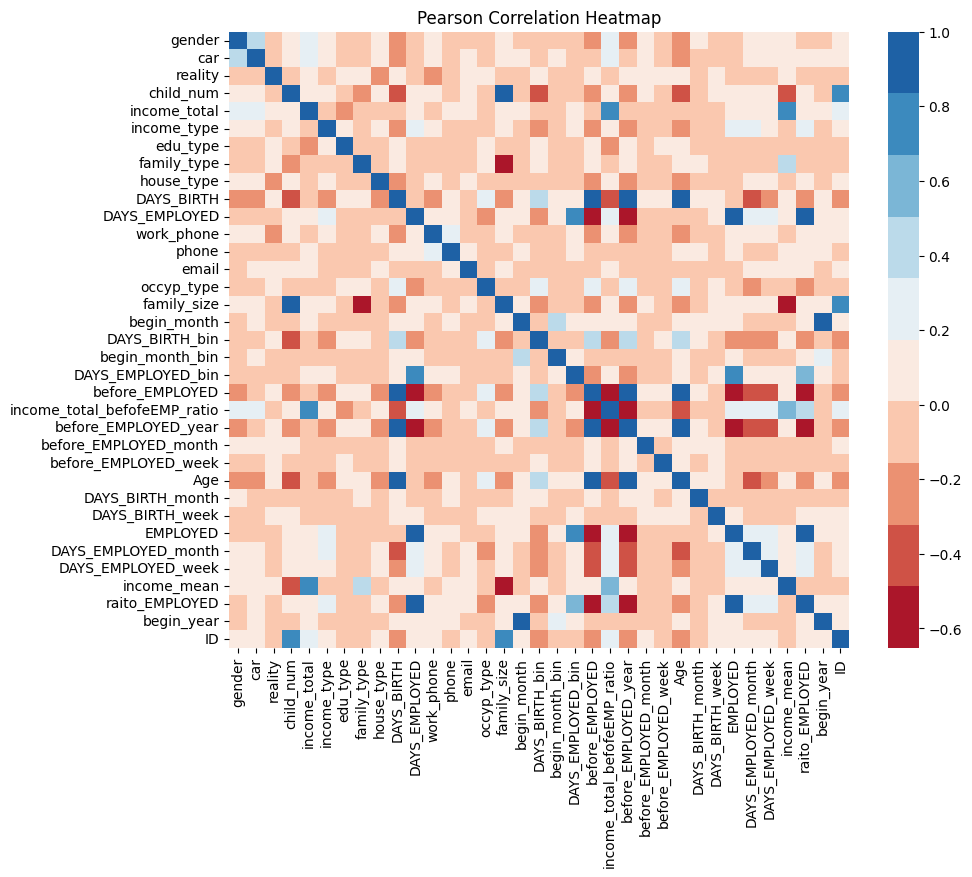

In [ ]:

plt.figure(figsize=(10, 8))

diverging_colors = sns.color_palette("RdBu", 10)
corr_matrix = train.corr(method='pearson')

# annot_kws 매개변수를 사용하여 폰트 사이즈 조절
sns.heatmap(
    corr_matrix, cmap=diverging_colors, annot=False,
    annot_kws={"size": 10}  # 원하는 폰트 사이즈로 설정
)

plt.title("Pearson Correlation Heatmap")

# 폰트 사이즈를 그림 크기에 맞게 설정
plt.rcParams.update({'font.size': 12})

plt.show(
)

## 모델링 전처리 ##

In [ ]:
from re import VERBOSE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier, Pool
import xgboost as XGB
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import numpy as np

#모델
cat = CatBoostClassifier(verbose=0)
xgb = XGBClassifier(VERBOSE=0)
lgbm = LGBMClassifier(VERBOSE=0)

In [ ]:
train.columns

Index(['income_total', 'income_type', 'edu_type', 'family_type', 'house_type',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'occyp_type', 'family_size',
       'begin_month', 'credit', 'DAYS_BIRTH_bin', 'begin_month_bin',
       'DAYS_EMPLOYED_bin', 'g_r_c', 'e_p_w', 'before_EMPLOYED',
       'income_total_befofeEMP_ratio', 'befor_EMPLOYED_year',
       'before_EMPLOYED_month', 'before_EMPLOYED_week', 'Age',
       'DAYS_BIRTH_month', 'DAYS_BIRTH_week', 'EMPLOYED',
       'DAYS_EMPLOYED_month', 'DAYS_EMPLOYED_week', 'income_mean',
       'ratio_EMPLOYED', 'ID', 'occyp_is'],
      dtype='object')

In [ ]:
"""train_test_split"""

seed=42
target = train['credit']
X = train.loc[:, train.columns != 'credit']

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 라벨을 숫자로 변환
target= label_encoder.fit_transform(target)

# x,y 로 분리한 train 데이터를 train, val 데이터로 분할 0.3
train_X, valid_X, train_y, valid_y = train_test_split(X,target,test_size=0.2, random_state=seed)

In [ ]:
if not isinstance(target, pd.DataFrame):
    target = pd.DataFrame(target)

In [ ]:
test['ID']=test['ID'].astype('int64')

In [ ]:
X_train = train.loc[:, train.columns != 'credit']
y_train = train['credit']

In [ ]:
X_test = test[['income_total', 'income_type', 'edu_type', 'family_type', 'house_type',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'occyp_type', 'family_size',
       'begin_month', 'DAYS_BIRTH_bin', 'begin_month_bin', 'DAYS_EMPLOYED_bin',
       'g_r_c', 'e_p_w', 'before_EMPLOYED', 'income_total_befofeEMP_ratio',
       'befor_EMPLOYED_year', 'before_EMPLOYED_month', 'before_EMPLOYED_week',
       'Age', 'DAYS_BIRTH_month', 'DAYS_BIRTH_week', 'EMPLOYED',
       'DAYS_EMPLOYED_month', 'DAYS_EMPLOYED_week', 'income_mean',
       'ratio_EMPLOYED', 'ID', 'occyp_is']]

In [ ]:
label_encoder = LabelEncoder()
y_train= label_encoder.fit_transform(y_train)

## 데이터 불균형 ##

In [ ]:
#SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', smote_X_train.shape, smote_y_train.shape)

SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (40179, 27) (40179,)


In [ ]:
smote_X_train, smote_y_train = smote.fit_resample(smote_X_train, smote_y_train)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', smote_X_train.shape, smote_y_train.shape)

SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (50868, 27) (50868,)


In [ ]:
##랜덤 언더 샘플링

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print('random_undersampling : ',X_rus.shape,y_rus.shape)
print('Resampled dataset shape %s' % Counter(y_rus))

random_undersampling :  (9666, 26) (9666,)
Resampled dataset shape Counter({0: 3222, 1: 3222, 2: 3222})


In [ ]:
#토멕링크
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X_train, y_train)
print('tomek_link :', X_tl.shape, y_tl.shape)
print('Resampled dataset shape %s' % Counter(y_tl))

tomek_link : (25262, 26) (25262,)
Resampled dataset shape Counter({2: 15773, 1: 6267, 0: 3222})


In [ ]:
#랜덤 오버샘플링
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('random_oversampling : ',X_ros.shape,y_ros.shape)

random_oversampling :  (50868, 26) (50868,)


In [ ]:
#SMOTE+tomek link
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_smtm, y_smtm= smoteto.fit_resample(X_train,y_train)
print('smote+tomek : ',X_smtm.shape, y_smtm.shape )

smote+tomek :  (50575, 26) (50575,)


# 모델링

In [ ]:
from typing import Dict, Tuple, Union, List

In [ ]:
def stratified_kfold_cat(
    params: Dict[str, Union[int, float, str, List[str]]],
    n_fold,
    X,
    target,
    X_test,
) -> Tuple[np.ndarray, np.ndarray]:
    folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
    splits = folds.split(X, target)
    cat_oof = np.zeros((X.shape[0], 3))
    cat_preds = np.zeros((X_test.shape[0], 3))
    cat_cols = [c for c in X.columns if X[c].dtypes == "int64"]

    for fold, (train_idx, valid_idx) in enumerate(splits):
        print(f"============ Fold {fold} ============\n")
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = target.iloc[train_idx], target.iloc[valid_idx]
        train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
        valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

        model = CatBoostClassifier(**params)

        model.fit(
            train_data,
            eval_set=valid_data,
            early_stopping_rounds=100,
            use_best_model=True,
            verbose=100,
        )

        cat_oof[valid_idx] = model.predict_proba(X_valid)
        cat_preds += model.predict_proba(X_test) / n_fold

    log_score = log_loss(target, cat_oof)
    print(f"Log Loss Score: {log_score:.5f}\n")
    return cat_oof, cat_preds


In [ ]:
# Light GBM
def stratified_kfold_lgbm(
    params: Dict[str, Union[int, float, str]],
    n_fold: int,
    X: pd.DataFrame,
    y: pd.DataFrame,
    X_test: pd.DataFrame,
) -> Tuple[np.ndarray, np.ndarray]:
    folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
    splits = folds.split(X, y)
    lgb_oof = np.zeros((X.shape[0], 3))
    lgb_preds = np.zeros((X_test.shape[0], 3))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        print(f"============ Fold {fold} ============\n")
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        pre_model = LGBMClassifier(**params)

        pre_model.fit(
            X_train,
            y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            eval_metric='multi_logloss',
        )
        params2 = params.copy()
        params2["learning_rate"] = params["learning_rate"] * 0.1

        model = LGBMClassifier(**params2)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            eval_metric='multi_logloss',
            init_model=pre_model,
        )
        lgb_oof[valid_idx] = model.predict_proba(X_valid)
        lgb_preds += model.predict_proba(X_test) / n_fold

    log_score = log_loss(y, lgb_oof)
    print(f"Log Loss Score: {log_score:.5f}")

    return lgb_oof, lgb_preds

In [ ]:

# XGB
def stratified_kfold_xgb(
    params: Dict[str, Union[int, float, str]],
    n_fold,
    X,
    y,
    X_test,
) -> Tuple[np.ndarray, np.ndarray]:

    folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
    splits = folds.split(X, y)
    xgb_oof = np.zeros((X.shape[0], 3))
    xgb_preds = np.zeros((X_test.shape[0], 3))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        print(f"============ Fold {fold} ============\n")
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        model = XGBClassifier(**params)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            early_stopping_rounds=100,
            verbose=100,
        )

        xgb_oof[valid_idx] = model.predict_proba(X_valid)
        xgb_preds += model.predict_proba(X_test) / n_fold

    log_score = log_loss(y, xgb_oof)
    print(f"Log Loss Score: {log_score:.5f}")

    return xgb_oof, xgb_preds



끄지 마시오!!! ㅠㅠㅠ


In [ ]:
cat_params = {
    "random_state": 42,
    "eval_metric": "MultiClass",
    "loss_function": "MultiClass",
    'learning_rate': 0.01443340240633889,
    'n_estimators': 6728, 'max_depth': 8,
    'random_strength': 51,
    "cat_features": ['income_type', 'edu_type', 'family_type', 'house_type','occyp_type','DAYS_BIRTH_bin', 'begin_month_bin', 'DAYS_EMPLOYED_bin',
       'g_r_c', 'e_p_w','befor_EMPLOYED_year','ID','occyp_is']}
cat_oof, cat_preds = stratified_kfold_cat(cat_params, 10, X, target, X_test)

============ Fold 0 ============

0:	learn: 1.0921752	test: 1.0922563	best: 1.0922563 (0)	total: 735ms	remaining: 1h 22m 25s
100:	learn: 0.8800047	test: 0.8792721	best: 0.8792721 (100)	total: 32.7s	remaining: 35m 44s
200:	learn: 0.8410028	test: 0.8334489	best: 0.8334489 (200)	total: 60s	remaining: 32m 28s
300:	learn: 0.8128450	test: 0.7948266	best: 0.7948259 (299)	total: 1m 32s	remaining: 32m 50s
400:	learn: 0.7944487	test: 0.7699609	best: 0.7699609 (400)	total: 2m 4s	remaining: 32m 40s
500:	learn: 0.7825301	test: 0.7526423	best: 0.7526423 (500)	total: 2m 34s	remaining: 31m 55s
600:	learn: 0.7732984	test: 0.7400189	best: 0.7400189 (600)	total: 3m 1s	remaining: 30m 45s
700:	learn: 0.7643831	test: 0.7271389	best: 0.7271389 (700)	total: 3m 45s	remaining: 32m 14s
800:	learn: 0.7512081	test: 0.7109621	best: 0.7109621 (799)	total: 4m 19s	remaining: 31m 57s
900:	learn: 0.7297251	test: 0.6847028	best: 0.6847028 (900)	total: 5m 2s	remaining: 32m 33s
1000:	learn: 0.7130573	test: 0.6672397	best: 

In [ ]:
xgb_params = {
    "random_state": 42,
    "n_estimators": 10000,
    "objective": "multi:softmax",
    "eval_metric": "mlogloss",
    'learning_rate': 0.1,
    'max_depth': 4,
    'num_leaves': 4,
    'colsample_bytree': 0.65,
    'max_bin': 360}

xgb_oof, xgb_preds = stratified_kfold_xgb(xgb_params, 10, X, target, X_test)

============ Fold 0 ============

[0]	validation_0-mlogloss:1.05697	validation_1-mlogloss:1.05697
[100]	validation_0-mlogloss:0.74910	validation_1-mlogloss:0.77815
[200]	validation_0-mlogloss:0.70393	validation_1-mlogloss:0.75777
[300]	validation_0-mlogloss:0.66821	validation_1-mlogloss:0.74459
[400]	validation_0-mlogloss:0.63694	validation_1-mlogloss:0.73408
[500]	validation_0-mlogloss:0.61183	validation_1-mlogloss:0.72614
[600]	validation_0-mlogloss:0.58816	validation_1-mlogloss:0.72115
[700]	validation_0-mlogloss:0.56647	validation_1-mlogloss:0.71585
[800]	validation_0-mlogloss:0.54815	validation_1-mlogloss:0.71300
[900]	validation_0-mlogloss:0.53041	validation_1-mlogloss:0.71052
[1000]	validation_0-mlogloss:0.51521	validation_1-mlogloss:0.70914
[1100]	validation_0-mlogloss:0.50011	validation_1-mlogloss:0.70797
[1200]	validation_0-mlogloss:0.48609	validation_1-mlogloss:0.70675
[1300]	validation_0-mlogloss:0.47292	validation_1-mlogloss:0.70556
[1400]	validation_0-mlogloss:0.46042	val

In [ ]:
lgb_params = {
    "objective": "multiclass",
    "metric": "multi_logloss",
    "verbosity":0,
    "random_state": 42,
    "boosting_type": "gbdt",
    "learning_rate": 0.05, 'max_depth': 5, 'num_leaves': 147,}
lgbm_oof, lgbm_preds = stratified_kfold_lgbm(lgb_params, 10, X, target, X_test)

============ Fold 0 ============

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

Exception ignored on calling ctypes callback function: <function _log_callback at 0x7936e98fab00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 203, in _log_callback
    def _log_callback(msg: bytes) -> None:
KeyboardInterrupt: 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [ ]:
train_pred = np.concatenate([cat_oof, lgbm_oof, xgb_oof], axis=1)
train_pred.shape

(26451, 9)

In [ ]:
test_pred = np.concatenate([cat_preds, lgbm_preds, xgb_preds], axis=1)
test_pred.shape

(10000, 9)

In [ ]:
import torch

In [ ]:
!pip install pytorch_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 953.0 kB/s eta 0:00:00


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from pytorch_tabnet.multitask import TabNetMultiTaskClassifier

In [ ]:
n_fold = 10
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
splits = folds.split(train_pred, target)
net_oof = np.zeros((train_pred.shape[0], 3))
net_preds = np.zeros((test_pred.shape[0], 3))
for fold, (train_idx, valid_idx) in enumerate(splits):
    print(f"============ Fold {fold} ============\n")
    X_train, X_valid = train_pred[train_idx], train_pred[valid_idx]
    y_train, y_valid = target[train_idx], target[valid_idx]
    model = TabNetMultiTaskClassifier(
            n_d=64, n_a=64, n_steps=1,
            lambda_sparse=1e-4,
            optimizer_fn=torch.optim.Adam,
            optimizer_params=dict(lr=2e-2),
            scheduler_params = {"gamma": 0.9, "step_size": 50},
            scheduler_fn=torch.optim.lr_scheduler.StepLR,
            mask_type="entmax",
    )

    model.fit(
        X_train, y_train.reshape(-1,1),
        eval_set=[(X_valid, y_valid.reshape(-1,1))],
        max_epochs=100,
        batch_size=1024,
        eval_metric=["logloss"],
        virtual_batch_size=128,
        num_workers=1,
        drop_last=False
    )
    net_oof[valid_idx] = model.predict_proba(X_valid)
    net_preds += model.predict_proba(test_pred)[0] / n_fold
log_score = log_loss(train_y, net_oof)
print(f"Log Loss Score: {log_score:.5f}")

============ Fold 0 ============

epoch 0  | loss: 0.79297 | val_0_logloss: 0.74998 |  0:00:03s
epoch 1  | loss: 0.70012 | val_0_logloss: 0.73828 |  0:00:05s
epoch 2  | loss: 0.6854  | val_0_logloss: 0.74143 |  0:00:08s
epoch 3  | loss: 0.67955 | val_0_logloss: 0.75165 |  0:00:12s
epoch 4  | loss: 0.67955 | val_0_logloss: 0.77014 |  0:00:15s
epoch 5  | loss: 0.67618 | val_0_logloss: 0.74248 |  0:00:17s
epoch 6  | loss: 0.67507 | val_0_logloss: 0.74279 |  0:00:20s
epoch 7  | loss: 0.67674 | val_0_logloss: 0.7243  |  0:00:24s
epoch 8  | loss: 0.67335 | val_0_logloss: 0.71835 |  0:00:27s
epoch 9  | loss: 0.67142 | val_0_logloss: 0.71217 |  0:00:30s
epoch 10 | loss: 0.67384 | val_0_logloss: 0.69299 |  0:00:32s
epoch 11 | loss: 0.67319 | val_0_logloss: 0.68858 |  0:00:35s
epoch 12 | loss: 0.67281 | val_0_logloss: 0.69792 |  0:00:38s
epoch 13 | loss: 0.67213 | val_0_logloss: 0.67068 |  0:00:41s
epoch 14 | loss: 0.67296 | val_0_logloss: 0.6674  |  0:00:44s
epoch 15 | loss: 0.67541 | val_0_log

ValueError: Found input variables with inconsistent numbers of samples: [26451, 21160]

In [ ]:
net_preds

array([[0.12475667, 0.24455313, 0.63069021],
       [0.28531237, 0.25069489, 0.46399273],
       [0.04831625, 0.07122582, 0.88045794],
       ...,
       [0.06137882, 0.1923614 , 0.74625977],
       [0.14353469, 0.31728875, 0.53917657],
       [0.05728993, 0.39668179, 0.54602829]])

In [ ]:
seed=42
target = train['credit']
X =np.array(train.loc[:, train.columns != 'credit'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 라벨을 숫자로 변환
target= label_encoder.fit_transform(target)
n_iter=0
cv_accuracy=[]

In [ ]:
str_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# split 개수 스텝 만큼 train, test 데이터셋을 매번 분할
for train_index, test_index in str_kf.split(X, target):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]

    cat.fit(X_train, y_train)

    pred = cat.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
21:	learn: 0.8119664	total: 1.63s	remaining: 1m 12s
22:	learn: 0.8103008	total: 1.68s	remaining: 1m 11s
23:	learn: 0.8092230	total: 1.73s	remaining: 1m 10s
24:	learn: 0.8078621	total: 1.77s	remaining: 1m 9s
25:	learn: 0.8069405	total: 1.81s	remaining: 1m 7s
26:	learn: 0.8059783	total: 1.85s	remaining: 1m 6s
27:	learn: 0.8050050	total: 1.9s	remaining: 1m 6s
28:	learn: 0.8039827	total: 1.95s	remaining: 1m 5s
29:	learn: 0.8030748	total: 2s	remaining: 1m 4s
30:	learn: 0.8022670	total: 2.03s	remaining: 1m 3s
31:	learn: 0.8014208	total: 2.07s	remaining: 1m 2s
32:	learn: 0.8007078	total: 2.12s	remaining: 1m 2s
33:	learn: 0.7999364	total: 2.16s	remaining: 1m 1s
34:	learn: 0.7994914	total: 2.2s	remaining: 1m
35:	learn: 0.7987380	total: 2.23s	remaining: 59.7s
36:	learn: 0.7982167	total: 2.27s	remaining: 59.2s
37:	learn: 0.7971716	total: 2.31s	remaining: 58.6s
38:	learn: 0.7965227	total: 2.37s	remaining: 58.3s
39:	learn: 0.7955538	total: 2.41s	remaining: 57.8s


In [ ]:
str_kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

# split 개수 스텝 만큼 train, test 데이터셋을 매번 분할
for train_index, test_index in str_kf.split(X, target):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]

    xgb.fit(X_train, y_train)

    pred = xgb.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#11 교차 검증 정확도 : 0.7192,  학습 데이터 크기 : 23805,  검증 데이터 크기 : 2646
#11 검증 세트 인덱스 : [   19    21    28 ... 26439 26440 26449]

#12 교차 검증 정확도 : 0.7202,  학습 데이터 크기 : 23806,  검증 데이터 크기 : 2645
#12 검증 세트 인덱스 : [    4    24    26 ... 26404 26409 26446]

#13 교차 검증 정확도 : 0.7191,  학습 데이터 크기 : 23806,  검증 데이터 크기 : 2645
#13 검증 세트 인덱스 : [    0    22    30 ... 26405 26410 26421]

#14 교차 검증 정확도 : 0.7214,  학습 데이터 크기 : 23806,  검증 데이터 크기 : 2645
#14 검증 세트 인덱스 : [    1     2     5 ... 26429 26441 26444]

#15 교차 검증 정확도 : 0.7233,  학습 데이터 크기 : 23806,  검증 데이터 크기 : 2645
#15 검증 세트 인덱스 : [   10    15    16 ... 26425 26428 26432]

#16 교차 검증 정확도 : 0.7123,  학습 데이터 크기 : 23806,  검증 데이터 크기 : 2645
#16 검증 세트 인덱스 : [    8    23    31 ... 26431 26442 26450]

#17 교차 검증 정확도 : 0.7104,  학습 데이터 크기 : 23806,  검증 데이터 크기 : 2645
#17 검증 세트 인덱스 : [    7    12    18 ... 26434 26436 26447]

#18 교차 검증 정확도 : 0.7096,  학습 데이터 크기 : 23806,  검증 데이터 크기 : 2645
#18 검증 세트 인덱스 : [   36    39    51 ... 26403 26418 26430]

#19 교차 검증 정확도 : 0.7142,  학습 데이터

In [ ]:
str_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# split 개수 스텝 만큼 train, test 데이터셋을 매번 분할
for train_index, test_index in str_kf.split(X, target):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]

    lgbm.fit(X_train, y_train)

    pred = lgbm.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

[LightGBM] [Warning] Unknown parameter: VERBOSE
[LightGBM] [Warning] Unknown parameter: VERBOSE
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2230
[LightGBM] [Info] Number of data points in the train set: 21160, number of used features: 28
[LightGBM] [Info] Start training from score -2.105487
[LightGBM] [Info] Start training from score -1.440078
[LightGBM] [Info] Start training from score -0.444251
[LightGBM] [Warning] Unknown parameter: VERBOSE

#6 교차 검증 정확도 : 0.7091,  학습 데이터 크기 : 21160,  검증 데이터 크기 : 5291
#6 검증 세트 인덱스 : [    4    19    21 ... 26440 26446 26449]
[LightGBM] [Warning] Unknown parameter: VERBOSE
[LightGBM] [Warning] Unknown parameter: VERBOSE
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003739 seconds.
You can set `force_row

In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(random_state=42,
                              verbose=0)
cat_model.fit(train_X,train_y)

val_pred = cat_model.predict(valid_X)
print('accuracy_score : ' ,accuracy_score(valid_y,val_pred))

val_pred2 = cat_model.predict_proba(valid_X)
print('log_loss : ' ,log_loss(valid_y,val_pred2))

cat_test_pred_proba = cat_model.predict_proba(X_test)

accuracy_score :  0.7105064247921391
log_loss :  0.7333725314377079


In [ ]:
xgb_test_pred_proba = xgb.predict_proba(X_test)

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(verbose=0)
lgbm.fit(train_X,train_y)

val_pred = lgbm.predict(valid_X)
print('accuracy_score : ' ,accuracy_score(valid_y,val_pred))

val_pred2 = lgbm.predict_proba(valid_X)
print('log_loss : ' ,log_loss(valid_y,val_pred2))

lgbm_test_pred_proba = lgbm.predict_proba(X_test)

accuracy_score :  0.7046485260770975
log_loss :  0.74014785557664


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42,
                    verbosity=0
                    )
xgb.fit(train_X,train_y)

val_pred = xgb.predict(valid_X)
print('accuracy_score : ' ,accuracy_score(valid_y,val_pred))

val_pred2 = xgb.predict_proba(valid_X)
print('log_loss : ' ,log_loss(valid_y,val_pred2))

xgb_test_pred_proba = xgb.predict_proba(X_test)

accuracy_score :  0.7123960695389266
log_loss :  0.7300434529466799


In [ ]:
#stratified k-fold

In [ ]:
missing_values = valid_X.isnull().sum().sum()
if missing_values > 0:
  print(f"There are {missing_values} missing values in the training data.")

In [ ]:
submission.iloc[:, 1:] = net_preds

In [ ]:
submission.head(20)

,index,0,1,2
0,26457,0.137001,0.205856,0.657143
1,26458,0.225602,0.272592,0.501806
2,26459,0.043523,0.081809,0.874668
3,26460,0.059779,0.081556,0.858665
4,26461,0.091027,0.217540,0.691433
5,26462,0.052302,0.095235,0.852463
6,26463,0.607928,0.362823,0.029249
7,26464,0.054887,0.079245,0.865868
8,26465,0.061429,0.096676,0.841895
9,26466,0.054614,0.315626,0.629760


In [ ]:
submission.to_csv('tabnet_param_submission_.csv', index=False)

# 피쳐중요도

In [ ]:
!pip install graphviz

Text(0.5, 1.0, 'XGBoost Feature Importance')

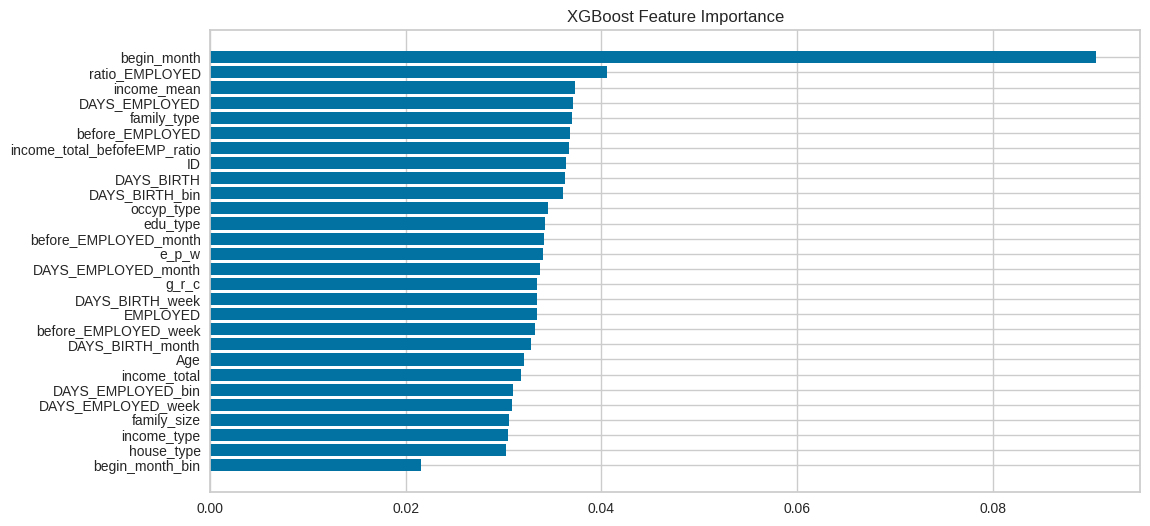

In [ ]:
feature_importance =xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('XGBoost Feature Importance')

In [ ]:
# 그냥 확인하기에 피쳐종류가 30개나 되어 한눈에 들어오지 않는다.
print(lgbm.feature_importances_, '\n')
# 시리즈로 만들어 인덱스를 붙인다
ser = pd.Series(lgbm.feature_importances_, index=X_train.columns)

# 내림차순 정렬을 이용한다
ser.sort_values(ascending=False)

top15 = ser.sort_values(ascending=False)[:15]
top15 = top15.to_frame()
top15.rename(columns={0:'feature_importance'}, inplace=True)
top15.head(15)

[100 138 113 600 135 163 190 114 105 121  47 500  52 296 357 162 604 284
 862 542 297 557 508 248 728 196 981] 



,feature_importance
ID,981
Age,862
income_mean,728
before_EMPLOYED_month,604
income_total,600
EMPLOYED,557
DAYS_BIRTH_month,542
DAYS_EMPLOYED_month,508
occyp_type,500
begin_month_bin,357


In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=34860524e8c78b7e14d669e78d545f827bd9af57b055cb1f30f09ef41dcf5aab
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(xgb, random_state=42).fit(valid_X, valid_y)
eli5.show_weights(perm, feature_names = valid_X.columns.tolist())

Weight,Feature
0.0660 ± 0.0048,begin_month_bin
0.0133 ± 0.0037,Age
0.0092 ± 0.0046,EMPLOYED
0.0085 ± 0.0046,ID
0.0074 ± 0.0067,income_mean
0.0071 ± 0.0015,DAYS_EMPLOYED_month
0.0068 ± 0.0029,occyp_type
0.0062 ± 0.0041,before_EMPLOYED_month
0.0057 ± 0.0046,income_total
0.0048 ± 0.0016,DAYS_BIRTH_month


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.4 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.Explainer(cat_model)
shap_values = explainer.shap_values(X_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_train)

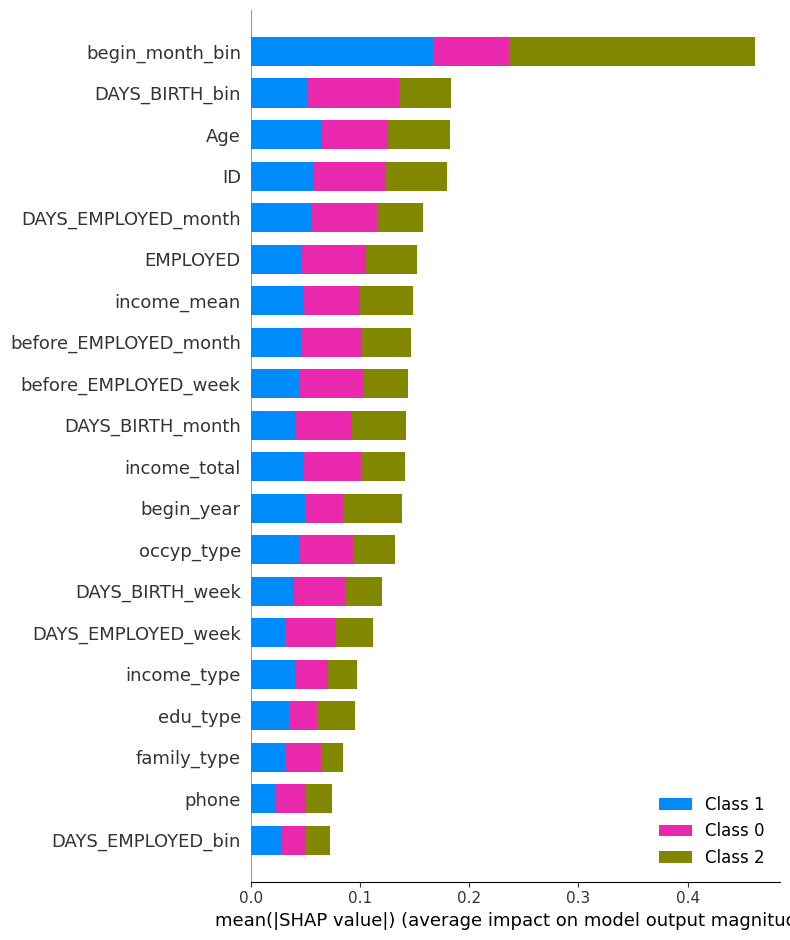

In [ ]:
shap.summary_plot(shap_values, X_train)

#  하이퍼 파라미터 튜닝


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.0 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from optuna import create_study
sampler = optuna.samplers.TPESampler()

In [ ]:
def objective(trial: Trial) -> float:
    params_lgb = {
        "random_state": 42,
        "verbosity": -1,
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.15),
        "n_estimators": 10000,
        "objective": "multiclass",
        "max_depth": trial.suggest_int("max_depth", 1, 20),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    X_train, X_valid, y_train, y_valid = train_test_split(X, target, test_size=0.2)

    model = LGBMClassifier(**params_lgb,metric='multi_logloss')  # metric 추가
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric='multi_logloss')

# 예측 확률값 얻기
    y_pred_proba = model.predict_proba(X_valid)

# log_loss 계산
    score = log_loss(y_valid, y_pred_proba, labels=np.unique(y_valid))
    return score

study = optuna.create_study(direction='minimize', sampler=sampler,)
study.optimize(objective, n_trials=10)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

[I 2024-02-13 14:03:02,900] A new study created in memory with name: no-name-e9d6d295-6981-4870-8ce6-7f6b7632764e
[I 2024-02-13 14:06:55,455] Trial 0 finished with value: 1.7719720245597004 and parameters: {'learning_rate': 0.14662246436103793, 'max_depth': 7, 'num_leaves': 182, 'colsample_bytree': 0.5802004157757541, 'min_child_samples': 78}. Best is trial 0 with value: 1.7719720245597004.
[I 2024-02-13 14:11:41,267] Trial 1 finished with value: 2.155007026500193 and parameters: {'learning_rate': 0.1437881735856858, 'max_depth': 12, 'num_leaves': 90, 'colsample_bytree': 0.47704113342782406, 'min_child_samples': 37}. Best is trial 0 with value: 1.7719720245597004.
[I 2024-02-13 14:14:13,704] Trial 2 finished with value: 1.5099754283231386 and parameters: {'learning_rate': 0.11476036309640511, 'max_depth': 5, 'num_leaves': 125, 'colsample_bytree': 0.6254453712203059, 'min_child_samples': 51}. Best is trial 2 with value: 1.5099754283231386.
[I 2024-02-13 14:16:20,127] Trial 3 finished wi

Best Score: 0.9334167670269756
Best trial: {'learning_rate': 0.1415723767441998, 'max_depth': 3, 'num_leaves': 147, 'colsample_bytree': 0.7861155452673733, 'min_child_samples': 28}


In [ ]:
def objective(trial: Trial) -> float:
    params_xgb = {
        "random_state": 42,
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.15),
        "n_estimators": 1000,
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "max_bin": trial.suggest_int("max_bin", 200, 500),  # 수정: 허용된 범위 내의 값으로 수정
    }

    X_train, X_valid, y_train, y_valid = train_test_split(X, target, test_size=0.2)


    num_classes = len(np.unique(y_train))
    model = XGBClassifier(**params_xgb,verbosity=0, metric='mlogloss', num_class=num_classes)  # 수정: 'multiclass' 대신 'mlogloss' 사용
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric='mlogloss', verbose=False)  # 수정: 'multiclass' 대신 'mlogloss' 사용

    y_pred_proba = model.predict_proba(X_valid)
    score = log_loss(y_valid, y_pred_proba, labels=np.unique(y_valid))

    return score

study = optuna.create_study(direction='minimize', sampler=sampler,)
study.optimize(objective, n_trials=10)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)


[I 2024-02-13 14:52:07,372] A new study created in memory with name: no-name-907844b5-5510-4351-a318-81bd03e0b544
[I 2024-02-13 14:52:20,719] Trial 0 finished with value: 0.7888925811806767 and parameters: {'learning_rate': 0.09087790795688802, 'max_depth': 1, 'num_leaves': 64, 'colsample_bytree': 0.7194526967440307, 'max_bin': 478}. Best is trial 0 with value: 0.7888925811806767.
[I 2024-02-13 14:53:07,447] Trial 1 finished with value: 1.0669401157821776 and parameters: {'learning_rate': 0.10183857858206118, 'max_depth': 10, 'num_leaves': 149, 'colsample_bytree': 0.8703406552604087, 'max_bin': 333}. Best is trial 0 with value: 0.7888925811806767.
[I 2024-02-13 14:53:20,123] Trial 2 finished with value: 0.785093828258806 and parameters: {'learning_rate': 0.07585910369770035, 'max_depth': 2, 'num_leaves': 93, 'colsample_bytree': 0.42950128237872903, 'max_bin': 366}. Best is trial 2 with value: 0.785093828258806.
[I 2024-02-13 14:53:31,580] Trial 3 finished with value: 0.7884536268246107

Best Score: 0.7399499804931672
Best trial: {'learning_rate': 0.09214663185116767, 'max_depth': 4, 'num_leaves': 4, 'colsample_bytree': 0.6474899503252541, 'max_bin': 362}


In [ ]:
a

In [ ]:
def objective(trial):
  param = {
      "random_state":42,
      'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.3),
      'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
      "n_estimators":trial.suggest_int("n_estimators", 1000, 10000),
      "max_depth":trial.suggest_int("max_depth", 4, 16),
      'random_strength' :trial.suggest_int('random_strength', 0, 100),
      "colsample_bylevel":trial.suggest_float("colsample_bylevel", 0.4, 1.0),
      "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1e-8,3e-5),
      "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
      "max_bin": trial.suggest_int("max_bin", 200, 500),
      'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
  }

  X_train, X_valid, y_train, y_valid = train_test_split(X,target,test_size=0.2)

  cat_features =['income_type', 'edu_type', 'family_type', 'house_type','occyp_type','DAYS_BIRTH_bin', 'begin_month_bin', 'DAYS_EMPLOYED_bin',
       'g_r_c', 'e_p_w','befor_EMPLOYED_year','ID']
  cat = CatBoostClassifier(**param)
  cat.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_valid,y_valid)],
          early_stopping_rounds=35,cat_features=cat_features,
          verbose=100)
  cat_pred = cat.predict_proba(X_valid)
  log_score = log_loss(y_valid, cat_pred)

  return log_score

sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name = 'cat_parameter_opt',
    direction = 'minimize',
    sampler = sampler,
)
study.optimize(objective, n_trials=10)
print("Best Score:",study.best_value)
print("Best trial",study.best_trial.params)

[I 2024-02-12 20:33:42,885] A new study created in memory with name: cat_parameter_opt


0:	learn: 1.0828841	test: 1.0828841	test1: 1.0830163	best: 1.0830163 (0)	total: 76.6ms	remaining: 9m 40s
100:	learn: 0.8814378	test: 0.8814378	test1: 0.8876556	best: 0.8876556 (100)	total: 3.52s	remaining: 4m 20s


[I 2024-02-12 20:33:48,390] Trial 0 finished with value: 0.8876524325480041 and parameters: {'learning_rate': 0.03574712922600244, 'bagging_temperature': 63.512210106407046, 'n_estimators': 7588, 'max_depth': 11, 'random_strength': 15, 'colsample_bylevel': 0.49359671220172163, 'l2_leaf_reg': 1.7519275289243016e-06, 'min_child_samples': 88, 'max_bin': 380, 'od_type': 'IncToDec'}. Best is trial 0 with value: 0.8876524325480041.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.8876524325
bestIteration = 104

Shrink model to first 105 iterations.
0:	learn: 0.9910055	test: 0.9915455	test1: 0.9959178	best: 0.9959178 (0)	total: 464ms	remaining: 22m 30s
100:	learn: 0.6875066	test: 0.7133034	test1: 0.8046674	best: 0.8038910 (97)	total: 25.3s	remaining: 11m 44s
200:	learn: 0.5990049	test: 0.6438465	test1: 0.7958894	best: 0.7953275 (188)	total: 47s	remaining: 10m 33s
300:	learn: 0.5346121	test: 0.6015480	test1: 0.7893816	best: 0.7883667 (296)	total: 1m 7s	remaining: 9m 43s
400:	learn: 0.4778797	test: 0.5651214	test1: 0.7846036	best: 0.7839118 (395)	total: 1m 29s	remaining: 9m 20s


[I 2024-02-12 20:35:24,361] Trial 1 finished with value: 0.7839117736823512 and parameters: {'learning_rate': 0.2708160864249968, 'bagging_temperature': 21.368329072358772, 'n_estimators': 2911, 'max_depth': 6, 'random_strength': 18, 'colsample_bylevel': 0.5825453457757226, 'l2_leaf_reg': 1.5747445384650815e-05, 'min_child_samples': 46, 'max_bin': 287, 'od_type': 'IncToDec'}. Best is trial 1 with value: 0.7839117736823512.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.7839117737
bestIteration = 395

Shrink model to first 396 iterations.
0:	learn: 1.0867900	test: 1.0867901	test1: 1.0865666	best: 1.0865666 (0)	total: 121ms	remaining: 10m 16s
100:	learn: 0.8198877	test: 0.7899784	test1: 0.8099881	best: 0.8099881 (100)	total: 1m 47s	remaining: 1h 29m 9s
200:	learn: 0.7483747	test: 0.6173388	test1: 0.7304495	best: 0.7304495 (200)	total: 5m 31s	remaining: 2h 14m 38s
300:	learn: 0.7247759	test: 0.5751979	test1: 0.7148973	best: 0.7148973 (300)	total: 8m 41s	remaining: 2h 18m 45s
400:	learn: 0.6977347	test: 0.5476052	test1: 0.7025729	best: 0.7025729 (400)	total: 11m 32s	remaining: 2h 15m 23s
500:	learn: 0.5509268	test: 0.4861348	test1: 0.6785556	best: 0.6785556 (500)	total: 19m 55s	remaining: 3h 3m 4s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.6767594245
bestIteration = 545

Shrink model to first 546 iterations.


[I 2024-02-12 21:05:39,283] Trial 2 finished with value: 0.6767594245112353 and parameters: {'learning_rate': 0.027010527749605478, 'bagging_temperature': 0.2920433847181412, 'n_estimators': 5105, 'max_depth': 14, 'random_strength': 20, 'colsample_bylevel': 0.708540663048167, 'l2_leaf_reg': 1.7776512920172654e-05, 'min_child_samples': 9, 'max_bin': 382, 'od_type': 'IncToDec'}. Best is trial 2 with value: 0.6767594245112353.


0:	learn: 0.9993750	test: 0.9993750	test1: 1.0029532	best: 1.0029532 (0)	total: 35.3ms	remaining: 4m 52s


[I 2024-02-12 21:05:40,678] Trial 3 finished with value: 0.8930317648065791 and parameters: {'learning_rate': 0.2521267904777921, 'bagging_temperature': 72.86653737491046, 'n_estimators': 8276, 'max_depth': 7, 'random_strength': 9, 'colsample_bylevel': 0.8105398159072941, 'l2_leaf_reg': 1.3210173287250643e-05, 'min_child_samples': 16, 'max_bin': 349, 'od_type': 'Iter'}. Best is trial 2 with value: 0.6767594245112353.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.8930317648
bestIteration = 12

Shrink model to first 13 iterations.
0:	learn: 1.0854350	test: 1.0855370	test1: 1.0856827	best: 1.0856827 (0)	total: 623ms	remaining: 39m 29s
100:	learn: 0.7758307	test: 0.7184918	test1: 0.7821208	best: 0.7821208 (100)	total: 43.8s	remaining: 26m 44s
200:	learn: 0.7079914	test: 0.6173382	test1: 0.7356536	best: 0.7356536 (200)	total: 1m 35s	remaining: 28m 40s
300:	learn: 0.6588995	test: 0.5699217	test1: 0.7187367	best: 0.7186874 (295)	total: 2m 29s	remaining: 29m 1s
400:	learn: 0.6144319	test: 0.5373217	test1: 0.7091205	best: 0.7091205 (400)	total: 3m 22s	remaining: 28m 38s
500:	learn: 0.5404022	test: 0.5072951	test1: 0.7018113	best: 0.7017491 (498)	total: 4m 26s	remaining: 29m 16s
600:	learn: 0.4772194	test: 0.4817193	test1: 0.6981808	best: 0.6980796 (596)	total: 5m 30s	remaining: 29m 20s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.6969239175
bestIteration = 650

S

[I 2024-02-12 21:12:05,550] Trial 4 finished with value: 0.696923917543848 and parameters: {'learning_rate': 0.024112898115291985, 'bagging_temperature': 4.467752817973908, 'n_estimators': 3805, 'max_depth': 10, 'random_strength': 55, 'colsample_bylevel': 0.5109126733153162, 'l2_leaf_reg': 2.9087842986659113e-05, 'min_child_samples': 79, 'max_bin': 482, 'od_type': 'IncToDec'}. Best is trial 2 with value: 0.6767594245112353.


0:	learn: 1.0081572	test: 1.0082096	test1: 1.0077199	best: 1.0077199 (0)	total: 117ms	remaining: 5m 22s
100:	learn: 0.7122246	test: 0.4877940	test1: 0.6829775	best: 0.6829578 (97)	total: 11.5s	remaining: 5m 1s
200:	learn: 0.6882141	test: 0.4778991	test1: 0.6816167	best: 0.6807284 (166)	total: 25.2s	remaining: 5m 21s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.6807283939
bestIteration = 166

Shrink model to first 167 iterations.


[I 2024-02-12 21:12:31,272] Trial 5 finished with value: 0.6807283938931361 and parameters: {'learning_rate': 0.22999586428143728, 'bagging_temperature': 0.022592797420156956, 'n_estimators': 2764, 'max_depth': 4, 'random_strength': 32, 'colsample_bylevel': 0.6332063738136893, 'l2_leaf_reg': 8.147757462899138e-06, 'min_child_samples': 84, 'max_bin': 307, 'od_type': 'Iter'}. Best is trial 2 with value: 0.6767594245112353.


0:	learn: 1.0866658	test: 1.0866658	test1: 1.0902700	best: 1.0902700 (0)	total: 25.6s	remaining: 11h 51m 21s
100:	learn: 0.4260548	test: 0.5650230	test1: 0.7910726	best: 0.7910726 (100)	total: 31m 49s	remaining: 8h 14m 46s
200:	learn: 0.2119060	test: 0.4329110	test1: 0.7642136	best: 0.7632705 (180)	total: 1h 4m 33s	remaining: 7h 52m 10s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.7632705312
bestIteration = 180

Shrink model to first 181 iterations.


[I 2024-02-12 22:21:56,843] Trial 6 finished with value: 0.763270531192628 and parameters: {'learning_rate': 0.016149614799999188, 'bagging_temperature': 16.172900811143155, 'n_estimators': 1671, 'max_depth': 16, 'random_strength': 77, 'colsample_bylevel': 0.5192294089205034, 'l2_leaf_reg': 1.7560829253683595e-07, 'min_child_samples': 83, 'max_bin': 412, 'od_type': 'Iter'}. Best is trial 2 with value: 0.6767594245112353.


0:	learn: 1.0928955	test: 1.0928993	test1: 1.0929170	best: 1.0929170 (0)	total: 92.1ms	remaining: 3m 8s
100:	learn: 0.8709428	test: 0.8605714	test1: 0.8729392	best: 0.8729392 (100)	total: 2m 52s	remaining: 55m 9s
200:	learn: 0.8243766	test: 0.7839772	test1: 0.8261095	best: 0.8261095 (200)	total: 6m 32s	remaining: 59m 54s
300:	learn: 0.7940766	test: 0.7222347	test1: 0.7934271	best: 0.7934267 (299)	total: 9m 14s	remaining: 53m 28s
400:	learn: 0.7791605	test: 0.6915888	test1: 0.7789280	best: 0.7789280 (400)	total: 11m 21s	remaining: 46m 28s
500:	learn: 0.7664502	test: 0.6634688	test1: 0.7658539	best: 0.7658539 (500)	total: 13m 30s	remaining: 41m 32s
600:	learn: 0.7548284	test: 0.6393683	test1: 0.7551629	best: 0.7551629 (600)	total: 15m 26s	remaining: 37m 1s
700:	learn: 0.7452860	test: 0.6222249	test1: 0.7485748	best: 0.7485748 (700)	total: 18m 38s	remaining: 35m 39s
800:	learn: 0.7333248	test: 0.5969759	test1: 0.7388971	best: 0.7388971 (800)	total: 21m 36s	remaining: 33m 28s
900:	learn: 0

[I 2024-02-12 23:30:52,139] Trial 7 finished with value: 0.6877676779623043 and parameters: {'learning_rate': 0.012863908101989912, 'bagging_temperature': 0.27155819552829413, 'n_estimators': 2042, 'max_depth': 15, 'random_strength': 62, 'colsample_bylevel': 0.5985388149115896, 'l2_leaf_reg': 1.9161149250778487e-06, 'min_child_samples': 34, 'max_bin': 297, 'od_type': 'IncToDec'}. Best is trial 2 with value: 0.6767594245112353.


0:	learn: 1.0161309	test: 1.0161309	test1: 1.0182106	best: 1.0182106 (0)	total: 35.2ms	remaining: 1m 12s
100:	learn: 0.2528598	test: 0.4425368	test1: 0.7452205	best: 0.7107915 (72)	total: 2m 39s	remaining: 51m 51s


[I 2024-02-12 23:33:58,701] Trial 8 finished with value: 0.7107915073259929 and parameters: {'learning_rate': 0.20441878352493792, 'bagging_temperature': 0.7742116473996251, 'n_estimators': 2076, 'max_depth': 13, 'random_strength': 76, 'colsample_bylevel': 0.7367663185416977, 'l2_leaf_reg': 2.3131305726837285e-05, 'min_child_samples': 52, 'max_bin': 357, 'od_type': 'IncToDec'}. Best is trial 2 with value: 0.6767594245112353.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.7107915073
bestIteration = 72

Shrink model to first 73 iterations.
0:	learn: 1.0907592	test: 1.0907696	test1: 1.0908853	best: 1.0908853 (0)	total: 573ms	remaining: 1h 4m 16s
100:	learn: 0.8689702	test: 0.8568221	test1: 0.8708786	best: 0.8708786 (100)	total: 32.7s	remaining: 35m 44s
200:	learn: 0.8243505	test: 0.7813378	test1: 0.8187837	best: 0.8187837 (200)	total: 1m 5s	remaining: 35m 25s
300:	learn: 0.8025643	test: 0.7273250	test1: 0.7895795	best: 0.7895795 (300)	total: 1m 36s	remaining: 34m 25s
400:	learn: 0.7890982	test: 0.6956555	test1: 0.7727788	best: 0.7727784 (399)	total: 2m 5s	remaining: 32m 54s
500:	learn: 0.7785125	test: 0.6665620	test1: 0.7595622	best: 0.7595622 (500)	total: 2m 35s	remaining: 32m 10s
600:	learn: 0.7675263	test: 0.6354329	test1: 0.7462996	best: 0.7462996 (600)	total: 3m 11s	remaining: 32m 35s
700:	learn: 0.7595670	test: 0.6133440	test1: 0.7370112	best: 0.7370112 (700)	total: 3m 42s	remaining

[I 2024-02-12 23:43:13,950] Trial 9 finished with value: 0.675644551333781 and parameters: {'learning_rate': 0.01443340240633889, 'bagging_temperature': 0.0133572404119741, 'n_estimators': 6728, 'max_depth': 8, 'random_strength': 51, 'colsample_bylevel': 0.9445398843556558, 'l2_leaf_reg': 7.486273952174759e-06, 'min_child_samples': 44, 'max_bin': 427, 'od_type': 'IncToDec'}. Best is trial 9 with value: 0.675644551333781.


Best Score: 0.675644551333781
Best trial {'learning_rate': 0.01443340240633889, 'bagging_temperature': 0.0133572404119741, 'n_estimators': 6728, 'max_depth': 8, 'random_strength': 51, 'colsample_bylevel': 0.9445398843556558, 'l2_leaf_reg': 7.486273952174759e-06, 'min_child_samples': 44, 'max_bin': 427, 'od_type': 'IncToDec'}


In [ ]:
def objective(trial):
  param = {
      "random_state":42,
      'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.3),
      'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
      "n_estimators":trial.suggest_int("n_estimators", 1000, 10000),
      "max_depth":trial.suggest_int("max_depth", 4, 16),
      'random_strength' :trial.suggest_int('random_strength', 0, 100),
      "colsample_bylevel":trial.suggest_float("colsample_bylevel", 0.4, 1.0),
      "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1e-8,3e-5),
      "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
      "max_bin": trial.suggest_int("max_bin", 200, 500),
      'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
  }

  X_train, X_valid, y_train, y_valid = train_test_split(X,target,test_size=0.2)

  cat_features =['income_type', 'edu_type', 'family_type', 'house_type','occyp_type','DAYS_BIRTH_bin', 'begin_month_bin', 'DAYS_EMPLOYED_bin',
       'g_r_c', 'e_p_w','befor_EMPLOYED_year','ID']
  cat = CatBoostClassifier(**param)
  cat.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_valid,y_valid)],
          early_stopping_rounds=35,cat_features=cat_features,
          verbose=100)
  cat_pred = cat.predict_proba(X_valid)
  log_score = log_loss(y_valid, cat_pred)

    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)


[I 2024-02-12 20:25:50,680] A new study created in memory with name: no-name-2fa6e88c-b061-4dd3-a02d-74653b60ba79
[I 2024-02-12 20:26:26,894] Trial 0 finished with value: 0.7546542666481344 and parameters: {'depth': 3, 'learning_rate': 0.07986020859746835, 'num_leaves': 16, 'min_child_samples': 25, 'max_bin': 273}. Best is trial 0 with value: 0.7546542666481344.
[I 2024-02-12 20:26:55,571] Trial 1 finished with value: 0.7467640596293751 and parameters: {'depth': 18, 'learning_rate': 0.1706727684755356, 'num_leaves': 6, 'min_child_samples': 70, 'max_bin': 237}. Best is trial 1 with value: 0.7467640596293751.
[I 2024-02-12 20:27:43,804] Trial 2 finished with value: 0.7395093307690508 and parameters: {'depth': 6, 'learning_rate': 0.1273578948863078, 'num_leaves': 22, 'min_child_samples': 35, 'max_bin': 222}. Best is trial 2 with value: 0.7395093307690508.
[I 2024-02-12 20:28:14,464] Trial 3 finished with value: 0.7272925026225201 and parameters: {'depth': 20, 'learning_rate': 0.1934268207

Best Score: 0.7272925026225201
Best trial: {'depth': 20, 'learning_rate': 0.19342682071930395, 'num_leaves': 10, 'min_child_samples': 28, 'max_bin': 228}


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb= XGBClassifier()

xgb_param_grid={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15]
}

#score종류는 acc,f1,f1_micro,f1_macro등 원하는걸로 설정)
#여기서 설정 파라미터의 갯수(총 4000개의 조합이므로 4000번의 학습이 돌아감)
xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, scoring="neg_log_loss", n_jobs=-1, verbose=2)

# 그리드 서치 수행 (학습 데이터에 대해)
xgb_grid.fit(X_train, y_train)

# 최적의 f1_macro 수치와 해당 파라미터 출력
print("최적의 log_loss : {0: .4f}".format(-xgb_grid.best_score_))
print("최적의 파라미터 : ", xgb_grid.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
최적의 log_loss :  0.7586
최적의 파라미터 :  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [ ]:
import scipy

In [ ]:
import numpy as np

param_grid = {'n_estimators': [200, 300, 400],
              'depth': [4, 6, 8],
              'learning_rate': [0.01, 0.05, 0.1]}

cat = CatBoostClassifier(verbose=0)

cat.randomized_search(param_grid,
                      train_X, train_y,
                      cv=3, n_iter=10)


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, log_loss
import numpy as np

# CatBoost 모델 초기화
cat = CatBoostClassifier(verbose=0)

# 그리드 서치를 위한 파라미터 그리드 설정
params = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10]
}

scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=False)  # needs_proba를 False로 변경

clf_grid = GridSearchCV(estimator=cat, param_grid=params, scoring=scorer, cv=5)

# 그리드 서치 수행
clf_grid.fit(X_train, y_train)
best_param = clf_grid.best_params_
best_log_loss = -clf_grid.best_score_
print("최적의 파라미터:", best_param)
print("최적의 로그 손실:", best_log_loss)


In [ ]:

lgbm = LGBMClassifier(verbose=2)

# 그리드 서치를 위한 파라미터 그리드 설정
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7, 10, 15]
}

scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=False)  # needs_proba를 False로 변경

lgbm_grid = GridSearchCV(estimator=lgbm, param_grid=params, scoring=scorer, cv=5)

# 그리드 서치 수행
lgbm_grid.fit(X_train, y_train)
best_param = lgbm_grid.best_params_
best_log_loss = -lgbm_grid.best_score_
print("최적의 파라미터:", best_param)
print("최적의 로그 손실:", best_log_loss)

# 변수의 유의성 검정

카이제곱검정

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

chi2_list, p_list, dof_list, expected_list = [], [], [], []

# 카이제곱 독립성 검정
for i in object_columns:
    contingency_table = pd.crosstab(train[i], train['credit'])
    result = chi2_contingency(contingency_table)

    # 결과를 리스트에 저장
    chi2_list.append(result[0])
    p_list.append(result[1])
    dof_list.append(result[2])
    expected_list.append(result[3])

# 결과를 데이터프레임으로 생성
chi2independence = pd.DataFrame({
    'Chi-Square': chi2_list,
    'P-value': p_list,
    'Degrees of Freedom': dof_list,
    'Expected Frequencies': expected_list
},index=object_columns)

# 결과 출력
chi2independence.loc[chi2independence['P-value']<0.05]

,Chi-Square,P-value,Degrees of Freedom,Expected Frequencies
car,9.366187,9.250354e-03,2,"[[1998.5389588295338, 3887.2885335148007, 1052..."
reality,11.230277,3.642304e-03,2,"[[1050.6124532153794, 2043.50969717591, 5530.8..."
income_type,23.800389,2.475172e-03,8,"[[755.4664851990473, 1469.4315526823182, 3977...."
family_type,46.383397,2.009568e-07,8,"[[258.60292616536236, 502.99954633095155, 1361..."
house_type,37.725432,4.236293e-05,10,"[[13.399115345355563, 26.062152659634798, 70.5..."
phone,7.995643,1.835558e-02,2,"[[2274.0734943858456, 4423.221163661109, 11971..."
email,6.107595,4.717942e-02,2,"[[2927.8285130996937, 5694.817284790745, 15413..."
ID,28581.178905,0.000000e+00,17510,"[[0.1218101395032324, 0.23692866054213452, 0.6..."


In [ ]:
object_columns = object_columns.drop('credit')

로지스틱 회귀검정

In [ ]:
# 독립 변수와 더미 변수로 변환된 종속 변수 분리
X = train[numeric_columns]
y = train[['credit_0.0', 'credit_1.0', 'credit_2.0']]  # drop_first=False 이므로 모든 범주를 포함

# intercept(절편)을 독립 변수에 추가
X = sm.add_constant(X)

# 다중 범주 다항 로지스틱 회귀 모델 적합
model = sm.MNLogit(y, X)
result = model.fit()

# 각 범주에 대한 p-value 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.866411
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                26451
Model:                        MNLogit   Df Residuals:                    26421
Method:                           MLE   Df Model:                           28
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                 0.01828
Time:                        14:02:21   Log-Likelihood:                -22917.
converged:                       True   LL-Null:                       -23344.
Covariance Type:            nonrobust   LLR p-value:                1.148e-161
                y=credit_1.0       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.6317      0.022     28.506      0.000

In [ ]:
import numpy as np

# 각 범주에 대한 계수
coefficients_credit_1 = result.params['y=credit_1.0']
coefficients_credit_2 = result.params['y=credit_2.0']

# 로그 오즈 계산
log_odds_credit_1 = X.dot(coefficients_credit_1)
log_odds_credit_2 = X.dot(coefficients_credit_2)

# 오즈 계산 (로그 오즈를 지수화)
odds_credit_1 = np.exp(log_odds_credit_1)
odds_credit_2 = np.exp(log_odds_credit_2)

# odds 비 계산
odds_ratio = odds_credit_2 / odds_credit_1

print("Odds 비:", odds_ratio)

# 다중공선성 처리

In [ ]:
#VIF 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    train.values, i) for i in range(train.shape[1])]
vif["features"] = train.columns

In [ ]:

#필터메서드
def vif(x):
    # vif 10 초과시 drop을 위한 임계값 설정
    thresh = 10
    # Filter method로 feature selection 진행 후 최종 도출 될 데이터 프레임 형성
    output = pd.DataFrame()
    # 데이터의 컬럼 개수 설정
    k = x.shape[1]
    # VIF 측정
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif)
        print(f'Max VIF feature & value : {x.columns[a]}, {vif[a]}')
        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {np.round(vif[q],2)}입니다.')
            break
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    train_vif = output
    return train_vif

# 예시로 함수를 호출하는 부분
result_train_vif = vif(train)

In [ ]:
train =  train.drop(['DAYS_BIRTH', 'child_num', 'DAYS_EMPLOYED', 'before_EMPLOYED', 'before_EMPLOYED_year',
'raito_EMPLOYED', 'income_total_befofeEMP_ratio'],axis=1)
test = test.drop(['DAYS_BIRTH', 'child_num', 'DAYS_EMPLOYED', 'before_EMPLOYED', 'before_EMPLOYED_year',
'raito_EMPLOYED', 'begin_month', 'income_total_befofeEMP_ratio'],axis=1)

In [ ]:
#PCA전 선행작업: standard scaler
x_std = StandardScaler().fit_transform(X_train)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=27)
sklearn_pca_x = pca.fit_transform(x_std)

In [ ]:
pca_df = pd.DataFrame(sklearn_pca_x, index=X_train.index,
                      columns = [f"pca{num+1}" for num in range(X_train.shape[1])])
pca_df.head()

In [ ]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_.
                       '기여율':pca.explained_variance_ratio_}.
                      index = np.array([f"pca{num+1}" for num in range(X_train.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

In [ ]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

In [ ]:
n =5
kf = KFold(n_splits=n, shuffle=True, random_state=seed)

folds=[]
for train_idx, valid_idx in kf.split(train1, target):
        folds.append((train_idx, valid_idx))

cat_pred = np.zeros((train1.shape[0], 3))
cat_pred_test = np.zeros((X_test.shape[0], 3))
cat_cols = ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type','house_type', 'ID']
for fold in range(n):
  print(f'\n----------------- Fold {fold} -----------------\n')
  train_idx, valid_idx = folds[fold]
  X_train, X_valid, y_train, y_valid = train1.iloc[train_idx], train1.iloc[valid_idx], target[train_idx], target[valid_idx]
  label_encoder = LabelEncoder()
  y_train= label_encoder.fit_transform(y_train)
  y_valid= label_encoder.fit_transform(y_valid)
  target =label_encoder.fit_transform(target)

  train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
  valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

  model_cat = CatBoostClassifier()
  model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)

  cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
  cat_pred_test += model_cat.predict_proba(X_test) / n
  print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[valid_idx]):.6f}')

print(f'\tLog Loss: {log_loss(target, cat_pred):.6f}')


----------------- Fold 0 -----------------

Learning rate set to 0.114773
0:	learn: 1.0355486	test: 1.0361185	best: 1.0361185 (0)	total: 281ms	remaining: 4m 40s
100:	learn: 0.7081649	test: 0.6891514	best: 0.6890338 (95)	total: 20.6s	remaining: 3m 3s
200:	learn: 0.6854499	test: 0.6886915	best: 0.6877782 (137)	total: 32.5s	remaining: 2m 9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6877782344
bestIteration = 137

Shrink model to first 138 iterations.
CV Log Loss Score: 0.687778

----------------- Fold 1 -----------------

Learning rate set to 0.114773
0:	learn: 1.0352121	test: 1.0369373	best: 1.0369373 (0)	total: 117ms	remaining: 1m 56s
100:	learn: 0.7090602	test: 0.6837049	best: 0.6835595 (97)	total: 10.9s	remaining: 1m 36s
200:	learn: 0.6846417	test: 0.6824709	best: 0.6821205 (178)	total: 22.8s	remaining: 1m 30s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.682120495
bestIteration = 178

Shrink model to first 179 iterations.
CV Log Loss